# EDA

## 1. Chuẩn bị dữ liệu

In [3]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
customers = pd.read_csv("../data/2_clean/customers.csv")
orders = pd.read_csv("../data/2_clean/orders.csv")
order_items = pd.read_csv("../data/2_clean/order_items.csv")
payments = pd.read_csv("../data/2_clean/payments.csv")
products = pd.read_csv("../data/2_clean/products.csv")
reviews = pd.read_csv("../data/2_clean/reviews.csv")
geolocation = pd.read_csv("../data/2_clean/geolocation.csv")
sellers = pd.read_csv("../data/2_clean/sellers.csv")

In [5]:
timestamp_cols = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in timestamp_cols:
    orders[col] = pd.to_datetime(orders[col].astype(str), errors='coerce')

## 2. Phân tích mô tả

> Vẽ chân dung khách hàng là ai và họ đã làm gì?

### 2.1. Địa lý & Khả năng tiếp cận
**Mục tiêu**: Xác định khách hàng ở đâu và việc phục vụ họ khó khăn thế nào?
- Số lượng thành phố đóng góp 80% khách hàng? (Pie Chart, Quy tắc: 20 - 80)
- Top 10 thành phố đông khách nhất? (Bar Chart)
- Trung bình khách ở từng bang, miền phải trả bao nhiêu tiền ship & chờ bao nhiêu ngày?

#### Số lượng thành phố đóng góp 80% khách hàng? (Pie Chart, Quy tắc: 20 - 80)

In [6]:
total_cities = customers["customer_city"].nunique()

customer_by_city_df = customers.groupby("customer_city").size().reset_index(name="count")
customer_by_city_df = customer_by_city_df.sort_values("count", ascending=False)

total_customers = customer_by_city_df["count"].sum()
customer_by_city_df["percentage"] = customer_by_city_df["count"] / total_customers
customer_by_city_df["cum_percentage"] = customer_by_city_df["percentage"].cumsum()
pareto_cities = customer_by_city_df[customer_by_city_df["cum_percentage"] <= 0.8]

print("Tổng số thành phố:", total_cities)
print("Số lượng thành phố chiếm 80% khách hàng:", pareto_cities.shape[0])

Tổng số thành phố: 4119
Số lượng thành phố chiếm 80% khách hàng: 354


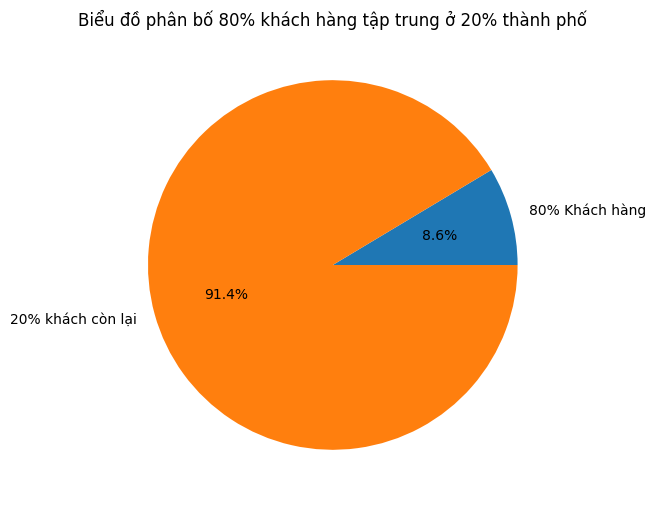

In [7]:
# Giá trị
top_20 = pareto_cities.shape[0]
total = total_cities
rest_80 = total_cities - pareto_cities.shape[0]

# Nhãn và giá trị
labels = ['80% Khách hàng', f'20% khách còn lại']
sizes = [top_20, rest_80]

# Vẽ biểu đồ
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Biểu đồ phân bố 80% khách hàng tập trung ở 20% thành phố')
plt.show()


#### Top 10 thành phố đông khách nhất? (Bar Chart)

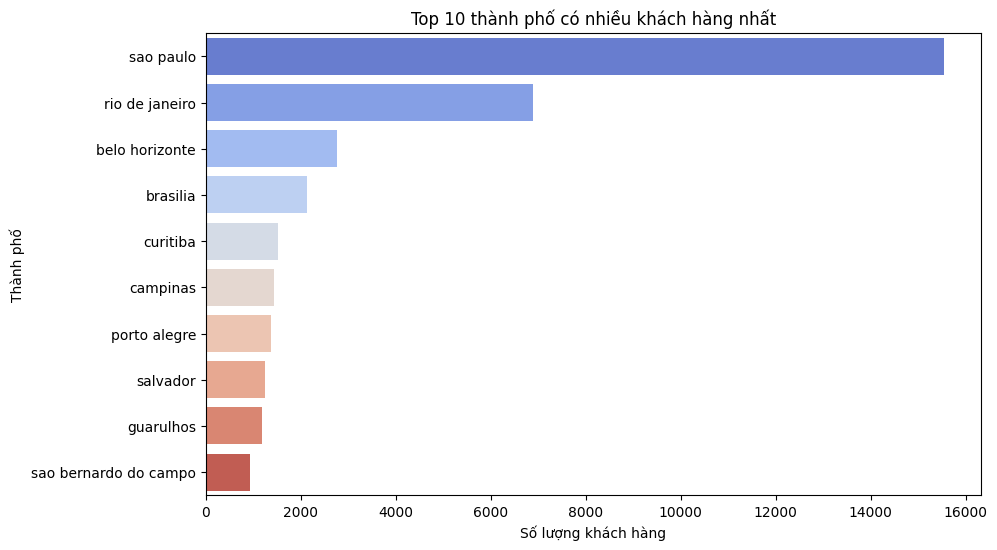

In [8]:
customer_by_city_df = customers.groupby("customer_city").size().reset_index(name="count")
customer_by_city_df = customer_by_city_df.sort_values("count", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='customer_city', data=customer_by_city_df.head(10), palette='coolwarm')
plt.title('Top 10 thành phố có nhiều khách hàng nhất')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Thành phố')
plt.show()

In [9]:
df = customers.groupby(["customer_city", "customer_state", "region"]).size().reset_index(name="count")
df = df.sort_values("count", ascending=False)
df.head(10)

,customer_city,customer_state,region,count
3758,sao paulo,SP,Southeast,15540
3281,rio de janeiro,RJ,Southeast,6882
469,belo horizonte,MG,Southeast,2773
587,brasilia,DF,Central-West,2131
1187,curitiba,PR,South,1521
739,campinas,SP,Southeast,1444
3080,porto alegre,RS,South,1379
3375,salvador,BA,Northeast,1245
1587,guarulhos,SP,Southeast,1189
3574,sao bernardo do campo,SP,Southeast,938


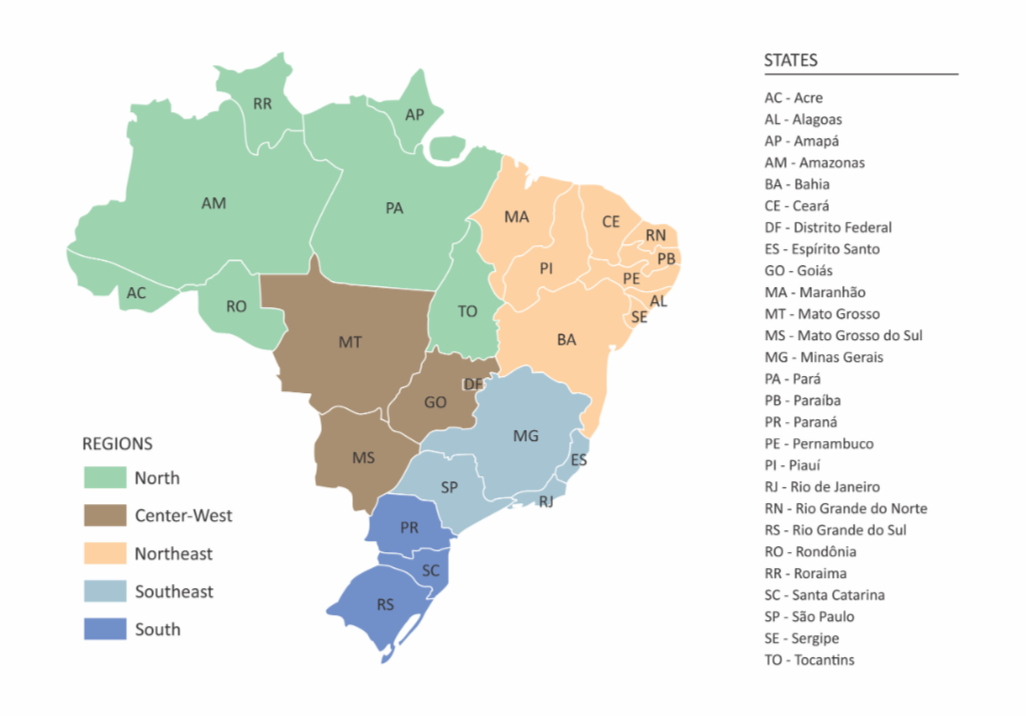

**Nhận xét**
- **São Paulo** dẫn đầu rõ rệt với 15.540 khách → trung tâm khách hàng lớn nhất.  
- **Các thành phố lớn khác** như Rio de Janeiro (6.882), Belo Horizonte (2.773), Brasília (2.131) cũng có lượng khách đáng kể nhưng thấp hơn São Paulo nhiều.  
- **Nhóm thành phố còn lại** (Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos, São Bernardo do Campo) có số lượng khách vừa phải (~938–1.500).  

💡 **Insight**: Khách hàng Olist **tập trung chủ yếu ở São Paulo và các thành phố lớn**; các đô thị khác có tiềm năng mở rộng marketing và logistics.

#### Trung bình khách ở từng bang, miền phải trả bao nhiêu tiền ship & chờ bao nhiêu ngày?

,customer_state,state_name,region,freight_value
20,RO,Rondônia,North,42.495391
14,PB,Paraíba,Northeast,42.135513
21,RR,Roraima,North,42.006829
0,AC,Acre,North,41.616375
16,PI,Piauí,Northeast,38.996134
9,MA,Maranhão,Northeast,38.260711
26,TO,Tocantins,North,38.055328
19,RN,Rio Grande do Norte,Northeast,36.796962
24,SE,Sergipe,Northeast,36.581791
1,AL,Alagoas,Northeast,36.264761


,customer_state,state_name,region,delivery_time_days
21,RR,Roraima,North,28.975610
3,AP,Amapá,North,26.731343
2,AM,Amazonas,North,25.986207
1,AL,Alagoas,Northeast,24.040302
13,PA,Pará,North,23.316068
9,MA,Maranhão,Northeast,21.117155
24,SE,Sergipe,Northeast,21.029851
5,CE,Ceará,Northeast,20.817826
0,AC,Acre,North,20.637500
14,PB,Paraíba,Northeast,19.953578


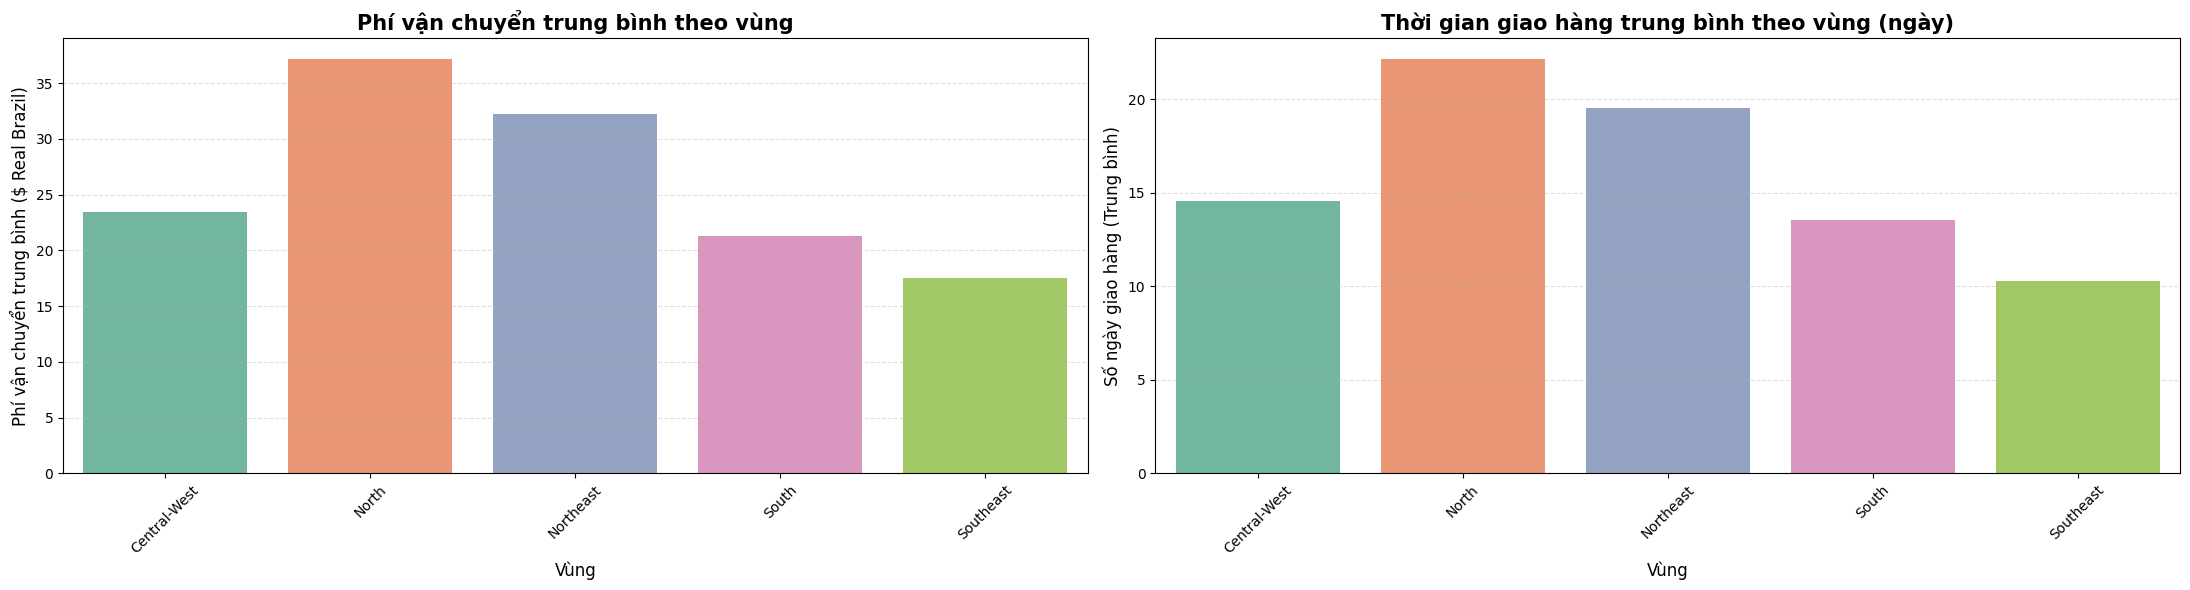

In [10]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

order_df = orders[(orders["order_status"] == "delivered") & (orders["order_delivered_customer_date"].notnull()) & (orders["order_purchase_timestamp"].notnull())]
order_df["delivery_time_days"] = (order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]).dt.days
order_df = order_df[["order_id", "customer_id", "delivery_time_days"]]

order_item_df = order_items[["order_id", "freight_value"]]
order_item_df = order_item_df.drop_duplicates(subset=["order_id"])  

payment_df = payments[["order_id", "payment_value"]]
payment_df = payment_df.groupby("order_id").agg({"payment_value": "sum"}).reset_index()

merged_df = order_df.merge(order_item_df, on="order_id", how="left").merge(customers, on="customer_id", how="left").merge(payment_df, on="order_id", how="left")
state_df = merged_df.groupby(["customer_state", "state_name", "region"]).agg({"freight_value": "mean", "delivery_time_days": "mean"}).reset_index()
## -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
display(state_df[["customer_state", "state_name", "region", "freight_value"]].sort_values(by="freight_value", ascending=False))
display(state_df[["customer_state", "state_name", "region", "delivery_time_days"]].sort_values(by="delivery_time_days", ascending=False))

## -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_plot = merged_df.groupby("region").agg({
    "freight_value": "mean",
    "delivery_time_days": "mean"
}).reset_index()

# Tạo figure gồm 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

# Màu palette
palette = sns.color_palette("Set2", len(df_plot))

# ------------------- 1. Freight Value --------------------
sns.barplot(
    ax=axes[0],
    data=df_plot,
    x="region",
    y="freight_value",
    palette=palette
)
axes[0].set_title("Phí vận chuyển trung bình theo vùng", fontsize=15, fontweight="bold")
axes[0].set_xlabel("Vùng", fontsize=12)
axes[0].set_ylabel("Phí vận chuyển trung bình ($ Real Brazil)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle="--", alpha=0.4)

# ------------------- 2. Delivery Time --------------------
sns.barplot(
    ax=axes[1],
    data=df_plot,
    x="region",
    y="delivery_time_days",
    palette=palette
)
axes[1].set_title("Thời gian giao hàng trung bình theo vùng (ngày)", fontsize=15, fontweight="bold")
axes[1].set_xlabel("Vùng", fontsize=12)
axes[1].set_ylabel("Số ngày giao hàng (Trung bình)", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

### 2.2. Tài chính & Chi tiêu
**Mục tiêu:** Đánh giá sức mua và độ "chịu chi" của khách
- Phân phối giá trị đơn hàng như thế nào? Đa số khách mua đơn hàng giá bao nhiêu?
- Có bao nhiêu khách hàng mua đơn hàng có giá trị đột biến (cực lớn)?
- Tỷ lệ phí vận chuyển trên giá trị hàng (Freight / Price) là bao nhiêu? Khách hàng có chấp nhận mua món rẻ tiền nhưng phí ship cao không?

#### Phân phối giá trị đơn hàng như thế nào? Đa số khách mua đơn hàng giá bao nhiêu?

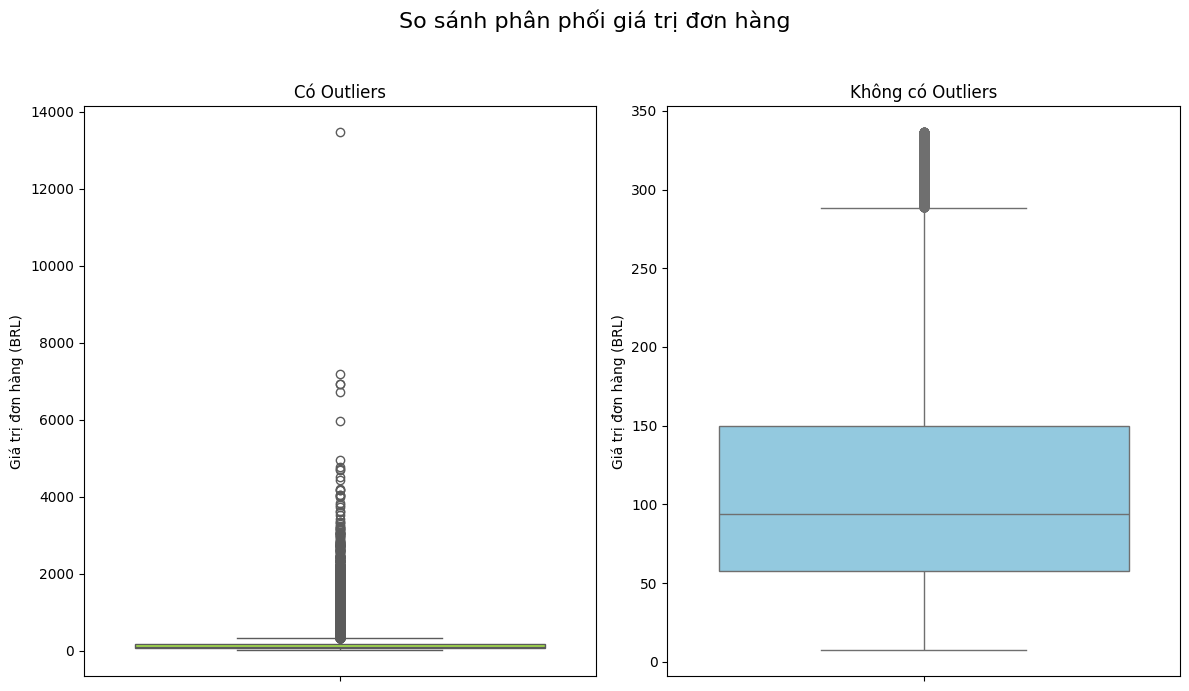

In [166]:
df = order_items.groupby(["order_id", "freight_value"]).agg({"price":"sum"}).reset_index()
df["order_total"] = (df["price"] + df["freight_value"]).round(2)

# Tính outliers
Q1 = df["order_total"].quantile(0.25)
Q3 = df["order_total"].quantile(0.75)
IQR = Q3 - Q1

non_outliers_df = df[(df["order_total"] >= (Q1 - 1.5 * IQR)) & (df["order_total"] <= (Q3 + 1.5 * IQR))]

# Tạo subplot
fig, axes = plt.subplots(1, 2, figsize=(12,7))  # 1 hàng, 2 cột

# Boxplot đầy đủ
sns.boxplot(y=df["order_total"], ax=axes[0], color='greenyellow')
axes[0].set_title("Có Outliers")
axes[0].set_ylabel("Giá trị đơn hàng (BRL)")

# Boxplot loại bỏ outliers
sns.boxplot(y=non_outliers_df["order_total"], ax=axes[1], color='skyblue')
axes[1].set_title("Không có Outliers")
axes[1].set_ylabel("Giá trị đơn hàng (BRL)")

plt.suptitle("So sánh phân phối giá trị đơn hàng", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # tránh trùng với suptitle
plt.show()


In [168]:
print(df.describe())

       freight_value          price    order_total
count  100857.000000  100857.000000  100857.000000
mean       20.151556     134.761531     154.913087
std        15.914234     207.231393     214.103592
min         0.000000       0.850000       7.280000
25%        13.180000      45.000000      60.310000
50%        16.350000      84.900000     101.970000
75%        21.260000     149.000000     170.780000
max       409.680000   13440.000000   13468.010000


**Nhận xét**

* **So sánh tổng thể:** Hai biểu đồ sử dụng thang đo trục Y khác nhau (0–14.000 BRL vs. 0–350 BRL), chứng tỏ các giá trị ngoại lai có ảnh hưởng lớn đến việc trực quan hóa dữ liệu.
* **Biểu đồ bên trái (Có Outliers):**
    * Hộp (Box) chính bị nén sát đáy, cho thấy phần lớn đơn hàng có giá trị rất nhỏ so với các đơn hàng lớn nhất.
    * Khoảng tứ phân vị (IQR) và đường trung vị (Median) gần như không thể xác định rõ ràng do thang đo bị kéo căng.
* **Biểu đồ bên phải (Không có Outliers):**
    * Phân phối trở nên rõ ràng và dễ phân tích hơn nhiều.
    * Hộp lớn, cho thấy 50% đơn hàng phổ biến nhất tập trung trong một phạm vi giá trị hẹp.

💡 **Insight**

* **Giá trị điển hình thấp:** Giá trị **Trung vị** của đơn hàng nằm trong khoảng **90–100 BRL**, cho thấy đây là mức chi tiêu phổ biến nhất của khách hàng.
* **Phạm vi chi tiêu phổ thông hẹp:** **50%** đơn hàng nằm trong khoảng từ **Q1 ($\approx$ 60 BRL)** đến **Q3 ($\approx$ 150 BRL)**. Điều này xác nhận rằng phần lớn khách hàng có mức chi tiêu khá đồng đều và thấp.
* **Đơn hàng đặc biệt:** Mặc dù 99% đơn hàng nằm dưới **350 BRL** (ngưỡng trên của biểu đồ bên phải), sự tồn tại của các **outliers** lên đến **14.000 BRL** cho thấy một lượng rất nhỏ khách hàng đặc biệt (hoặc đơn hàng bán sỉ/số lượng lớn) đóng góp một phần không nhỏ vào tổng doanh thu.

#### Có bao nhiêu khách hàng mua đơn hàng có giá trị đột biến (cực lớn)?

In [12]:
df = order_items.groupby(["order_id", "freight_value"]).agg({"price":"sum"}).reset_index()
df["order_total"] = (df["price"] + df["freight_value"]).round(2)

# Tính outliers
Q1 = df["order_total"].quantile(0.25)
Q3 = df["order_total"].quantile(0.75)
IQR = Q3 - Q1

outliers_df = df[(df["order_total"] > (Q3 + 1.5 * IQR))]

customers_outlier_df = outliers_df.merge(orders[["order_id", "customer_id"]], on="order_id", how="left").merge(customers, on="customer_id", how="left")

customers_outlier_df = customers_outlier_df.groupby(["customer_unique_id"]).agg({"order_total": "sum"}).reset_index().sort_values(by="order_total", ascending=False)
display(customers_outlier_df.sort_values(by="order_total", ascending=False))
print("Tổng số khách hàng có đơn hàng outlier:", len(customers_outlier_df))

,customer_unique_id,order_total
318,0a0a92112bd4c708ca5fde585afaa872,13468.01
6559,da122df9eeddfedc1dc1f5349a1a690c,7571.63
3608,763c8b1c9c68a0229c42c9fc6f662b93,7188.72
6626,dc4802a71eae9be1dd28f5d788ceb526,6929.31
2144,459bef486812aa25204be022145caa62,6922.21
...,...,...
2165,46527516a2c74ddc537d7489ab48ef37,336.61
968,1e89d084ae4ea90e522cc5158e8c98d9,336.60
1769,39a25ffcc4f83a144eff541e56ef7988,336.59
16,008f3d5f45a11059239a5c452cd00006,336.56


Tổng số khách hàng có đơn hàng outlier: 7705


#### Tỷ lệ phí vận chuyển trên giá trị hàng (Freight / Price) là bao nhiêu? Khách hàng có chấp nhận mua món rẻ tiền nhưng phí ship cao không?

In [13]:
df = order_items.groupby("order_id").agg(
    price=("price", "sum"),
    freight=("freight_value", "sum")
).reset_index()

df["price"] = df["price"].round(2)
df["freight_ratio"] = df["freight"] / df["price"]

In [14]:
df["freight_ratio"].describe()

count    98666.000000
mean         0.308389
std          0.314762
min          0.000000
25%          0.131864
50%          0.224374
75%          0.380191
max         21.447059
Name: freight_ratio, dtype: float64

In [15]:
df[df["freight_ratio"] > 1].sort_values(by="freight_ratio", ascending=False)

,order_id,price,freight,freight_ratio
42562,6e864b3f0ec71031117ad4cf46b7f2a1,0.85,18.23,21.447059
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23,21.447059
96795,fb265b2dc558a56445dfc48f8224e201,9.90,121.22,12.244444
82694,d642656598ae928a250620315d19e87e,4.99,37.04,7.422846
47937,7c92284adbec8033d160303d83065dbf,9.18,54.69,5.957516
...,...,...,...,...
21902,38ee876a426aeaf353e2a06a0e2b17d9,17.90,17.93,1.001676
24548,3fed89335b07739e36d2b4680ce3e900,31.89,31.94,1.001568
79630,cea6a91496c8046f157f38239f2cf06f,12.77,12.79,1.001566
17822,2e92b6acae58342ffb8861708b8c8270,14.50,14.52,1.001379


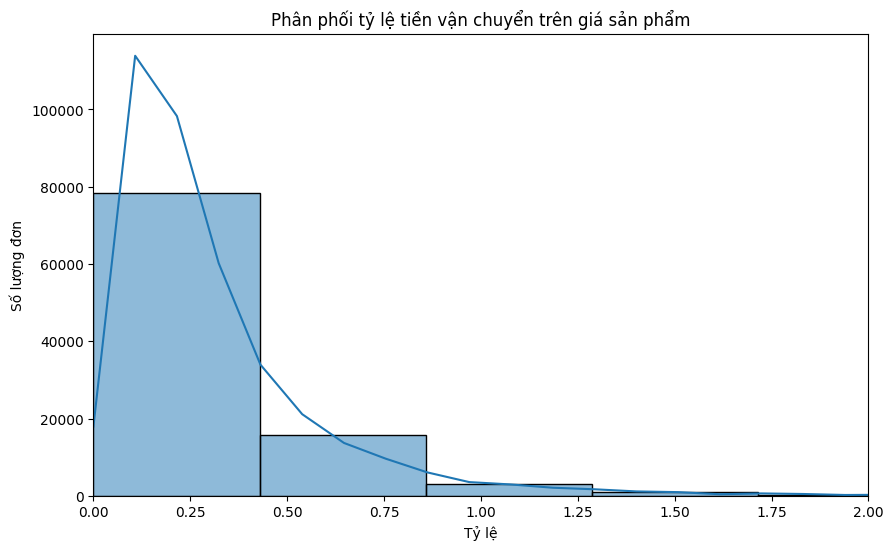

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df["freight_ratio"], bins=50, kde=True)
plt.xlim(0, 2)
plt.title("Phân phối tỷ lệ tiền vận chuyển trên giá sản phẩm")
plt.xlabel("Tỷ lệ")
plt.ylabel("Số lượng đơn")
plt.show()

### 2.3. Hành vi thanh toán
**Mục tiêu:** Hiểu thói quen tài chính và tín dụng (Đặc biệt quan trọng ở Brazil).
- Tỷ lệ đơn sử dụng Credit Card, Boleto (tiền mặt), Voucher, Debit Card là bao nhiêu? (Sở thích thanh toán)
- Số kỳ trả góp phổ biến là bao nhiêu (1, 3, 6 hay 12 lần)?
- Có mối liên hệ nào giữa Giá trị đơn hàng lớn và Số kỳ trả góp không? (Mua đắt thì trả góp dài?).

#### Tỷ lệ đơn sử dụng Credit Card, Boleto (tiền mặt), Voucher, Debit Card là bao nhiêu?

,payment_type,sum_payment_value
0,boleto,2869361.27
1,credit_card,12542084.19
2,debit_card,217989.79
3,not_defined,0.00
4,voucher,379436.87


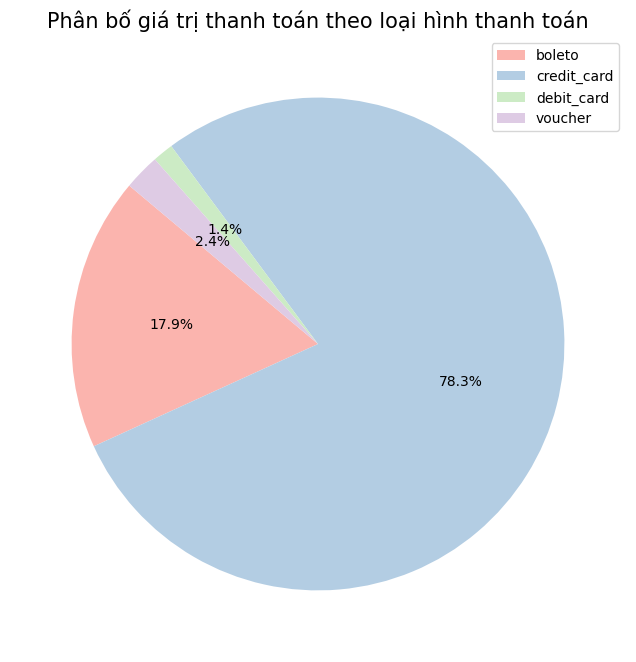

In [17]:
df = payments.groupby("payment_type").agg(sum_payment_value=("payment_value", "sum")).reset_index()
display(df)

df = df[df["payment_type"] != "not_defined"]
plt.figure(figsize=(8,8))
plt.pie(df['sum_payment_value'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Pastel1.colors)

plt.legend(df['payment_type'], loc="best")
plt.title("Phân bố giá trị thanh toán theo loại hình thanh toán", fontsize=15)
plt.show()

#### Số kỳ trả góp phổ biến là bao nhiêu (1, 3, 6 hay 12 lần)?

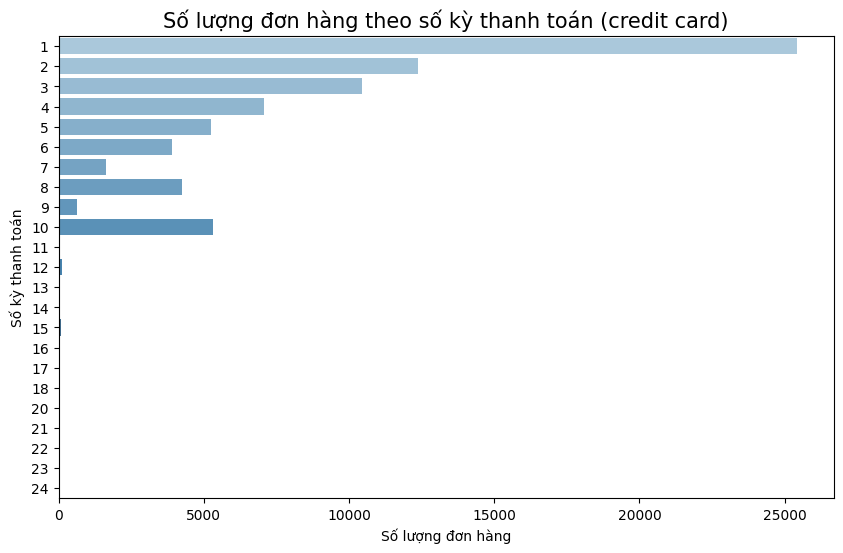

In [18]:
df = payments[payments["payment_type"] == "credit_card"]
df = df[["order_id", "payment_installments"]]
df.drop_duplicates(inplace=True)

df = df.groupby("payment_installments").agg(total=("order_id", "count")).reset_index()
df.sort_values(by="total", ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(
    y="payment_installments", 
    x="total", 
    data=df, 
    palette="Blues_d",
    orient="h"  # bắt buộc cho thanh ngang
)
plt.title("Số lượng đơn hàng theo số kỳ thanh toán (credit card)", fontsize=15)
plt.xlabel("Số lượng đơn hàng")
plt.ylabel("Số kỳ thanh toán")
plt.show()


####  Có mối liên hệ nào giữa Giá trị đơn hàng lớn và Số kỳ trả góp không? (Mua đắt thì trả góp dài?).

In [19]:
# Lấy các đơn trả bằng credit card
df_credit = payments[payments["payment_type"] == "credit_card"]

# Tính tổng giá trị thanh toán mỗi đơn
df_order = df_credit.groupby("order_id").agg({
    "payment_value": "sum",
    "payment_installments": "first"  # số kỳ trả góp của đơn
}).reset_index()


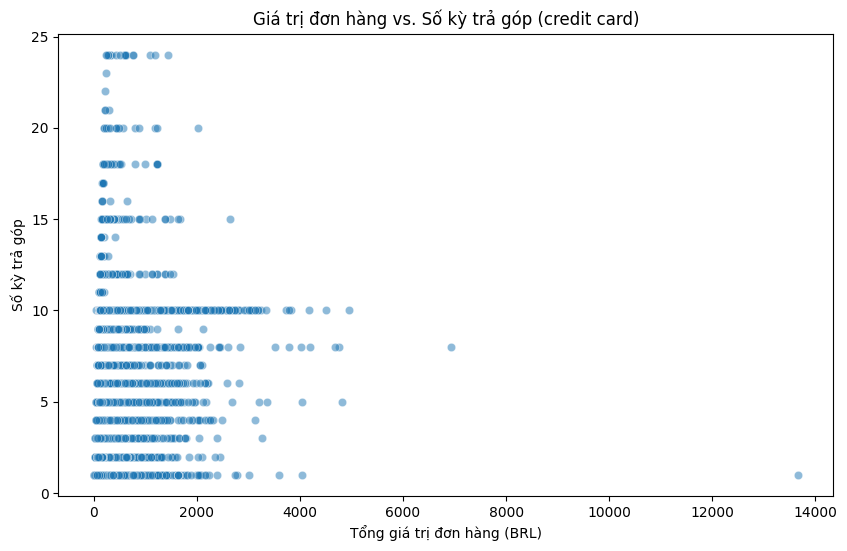

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="payment_value", 
    y="payment_installments", 
    data=df_order,
    alpha=0.5
)
plt.title("Giá trị đơn hàng vs. Số kỳ trả góp (credit card)")
plt.xlabel("Tổng giá trị đơn hàng (BRL)")
plt.ylabel("Số kỳ trả góp")
plt.show()

### 2.4. Sản phẩm quan tâm
**Mục tiêu:** Xác định nhu cầu và sở thích của khách hàng.
- Những danh mục sản phẩm nào đang mang lại nhiều khách hàng nhất?
- Có tháng nào trong năm mà một danh mục cụ thể tăng vọt không?

#### Những danh mục sản phẩm nào đang mang lại nhiều khách hàng nhất?

In [21]:
df = order_items.merge(products[["product_id", "product_category_name"]], on="product_id", how="left")

# Đếm số khách hàng duy nhất theo category
top_categories = df.groupby("product_category_name")["order_id"].nunique().reset_index()
top_categories = top_categories.sort_values(by="order_id", ascending=False).head(10)

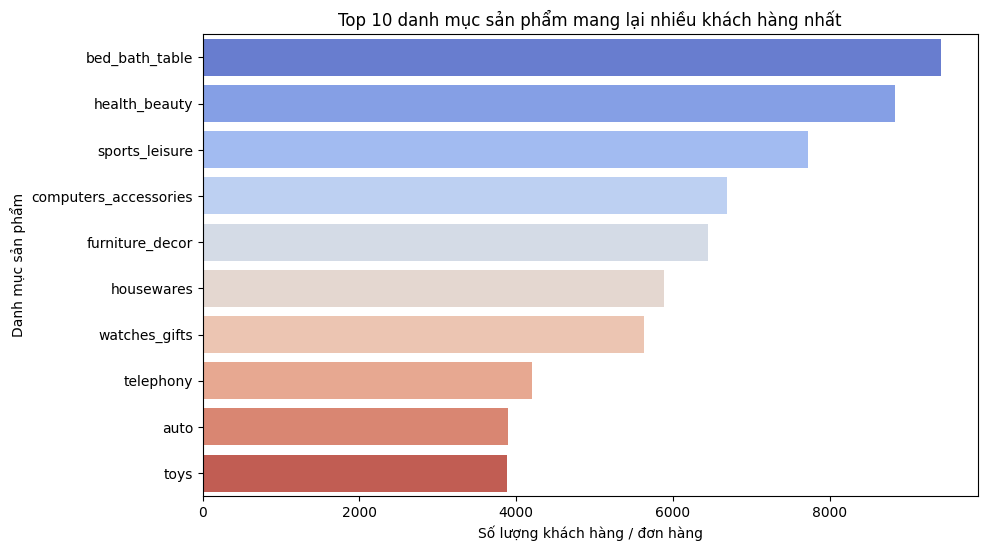

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="order_id", 
    y="product_category_name", 
    data=top_categories, 
    palette="coolwarm"
)
plt.title("Top 10 danh mục sản phẩm mang lại nhiều khách hàng nhất")
plt.xlabel("Số lượng khách hàng / đơn hàng")
plt.ylabel("Danh mục sản phẩm")
plt.show()

#### Có tháng nào trong năm mà một danh mục cụ thể tăng vọt không?

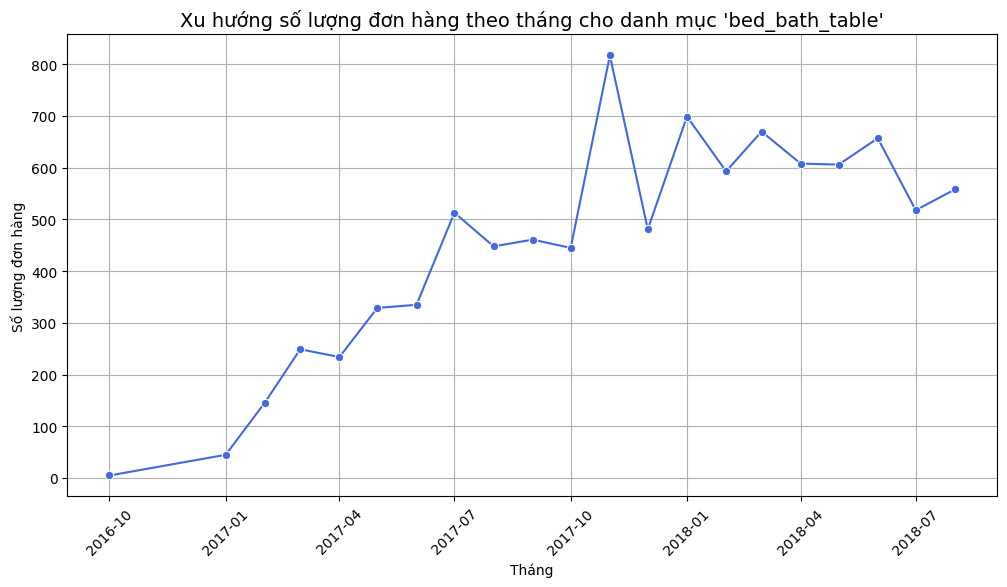

In [23]:
# Merge order_items + products + orders để lấy ngày đặt hàng và category
df = order_items.merge(products[["product_id", "product_category_name"]], on="product_id", how="left")
df = df.merge(orders[["order_id", "order_purchase_timestamp"]], on="order_id", how="left")

# Chuyển sang datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Chọn 1 danh mục
category = "bed_bath_table"
df_cat = df[df["product_category_name"].str.contains(category, case=False, na=False)]

# Tạo cột month/year
df_cat["order_month"] = df_cat["order_purchase_timestamp"].dt.to_period("M")

# Đếm số đơn hàng theo tháng
monthly_orders = df_cat.groupby("order_month")["order_id"].nunique().reset_index()
monthly_orders.rename(columns={"order_id":"num_orders"}, inplace=True)

# Chuyển về datetime để vẽ line chart
monthly_orders["order_month"] = monthly_orders["order_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x="order_month", y="num_orders", data=monthly_orders, marker="o", color="royalblue")
plt.title(f"Xu hướng số lượng đơn hàng theo tháng cho danh mục '{category}'", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số lượng đơn hàng")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2.5. Trải nghiệm & Sự hài lòng
**Mục tiêu:** Đo lường "Cảm xúc" của khách hàng sau khi mua.
- Điểm đánh giá trung bình (Review Score) toàn sàn là bao nhiêu? Tỷ lệ 5 sao vs 1 sao?
- Chênh lệch giữa "Ngày giao dự kiến" và "Ngày giao thực tế" là bao nhiêu? (Giao sớm hay giao trễ?).
- Bao nhiêu % đơn hàng bị giao trễ? Bao nhiêu % đơn hàng nhận 1 sao?

#### Điểm đánh giá trung bình (Review Score) toàn sàn là bao nhiêu? Tỷ lệ 5 sao vs 1 sao?

In [24]:
# Giả sử cột review_score lưu điểm 1–5
mean_score = reviews["review_score"].mean()
print("Điểm đánh giá trung bình toàn sàn:", round(mean_score,2))

Điểm đánh giá trung bình toàn sàn: 4.09


In [25]:
# Tính số lượng mỗi điểm
score_counts = reviews["review_score"].value_counts().sort_index()

# Tỷ lệ %
score_percent = (score_counts / score_counts.sum() * 100).round(2)
score_percent[[1,5]]  # chỉ lấy 1 sao và 5 sao

review_score
1    11.51
5    57.78
Name: count, dtype: float64

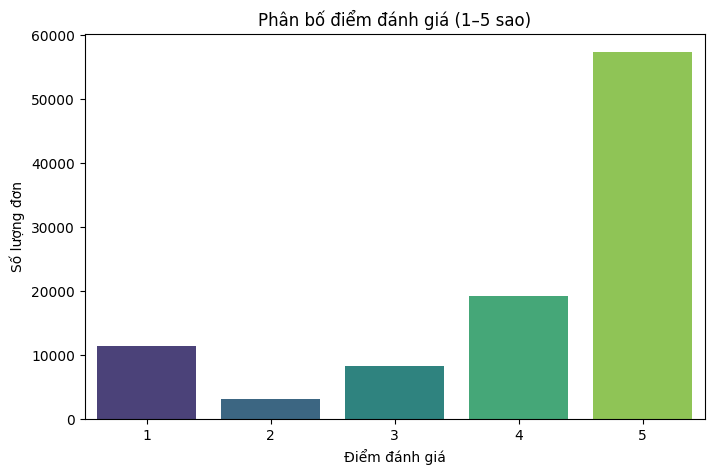

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x="review_score", data=reviews, palette="viridis")
plt.title("Phân bố điểm đánh giá (1–5 sao)")
plt.xlabel("Điểm đánh giá")
plt.ylabel("Số lượng đơn")
plt.show()

#### Chênh lệch giữa "Ngày giao dự kiến" và "Ngày giao thực tế" là bao nhiêu? (Giao sớm hay giao trễ?).

In [27]:
# Chuyển cột về kiểu datetime
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

# Tính số ngày chênh lệch
orders["delivery_delay"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days
orders["delivery_delay"].describe()

count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

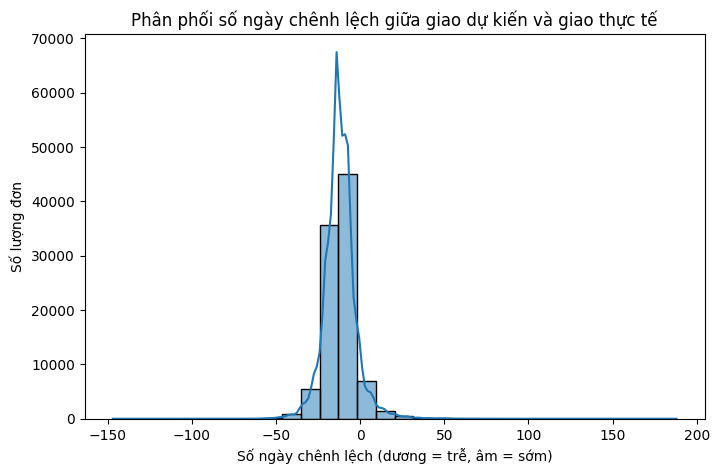

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(orders["delivery_delay"], bins=30, kde=True)
plt.title("Phân phối số ngày chênh lệch giữa giao dự kiến và giao thực tế")
plt.xlabel("Số ngày chênh lệch (dương = trễ, âm = sớm)")
plt.ylabel("Số lượng đơn")
plt.show()

**Nhận xét**

* Trung bình `delivery_delay` = **-11.88 ngày**, tức là **đa số đơn hàng được giao sớm hơn dự kiến**.
* Giá trị trung vị (50%) = **-12 ngày**, nghĩa là **50% đơn hàng giao sớm ít nhất 12 ngày**.
* Khoảng 25% đơn hàng giao sớm hơn **17 ngày trở lên**, 75% đơn hàng giao trễ tối đa **7 ngày**.
* Có một số **outlier**: đơn giao trễ đến **188 ngày**, hoặc giao sớm đến **147 ngày**, có thể là do **lỗi dữ liệu hoặc hủy/trì hoãn đơn hàng**.

💡 **Insight**
* Nhìn chung, **Olist giao hàng khá sớm so với dự kiến**, có thể do **dự đoán thời gian giao hơi dài**.
* Một số ít đơn hàng trễ nhiều → cần kiểm tra **logistics hoặc trường hợp ngoại lệ**.

#### Bao nhiêu % đơn hàng bị giao trễ? Bao nhiêu % đơn hàng nhận 1 sao?

In [29]:
# Tạo cột trạng thái giao hàng
df["delivery_status"] = orders["delivery_delay"].apply(
    lambda x: "Trễ" if x > 0 else ("Đúng hẹn/Sớm" if x <= 0 else "Không rõ")
)

# Tính %
percent_late = (df["delivery_status"] == "Trễ").mean() * 100
print(f"Tỷ lệ đơn hàng giao trễ: {percent_late:.2f}%")

Tỷ lệ đơn hàng giao trễ: 5.80%


In [30]:
# Tỷ lệ 1 sao
percent_1star = (reviews["review_score"] == 1).mean() * 100
print(f"Tỷ lệ đơn hàng nhận 1 sao: {percent_1star:.2f}%")

Tỷ lệ đơn hàng nhận 1 sao: 11.51%


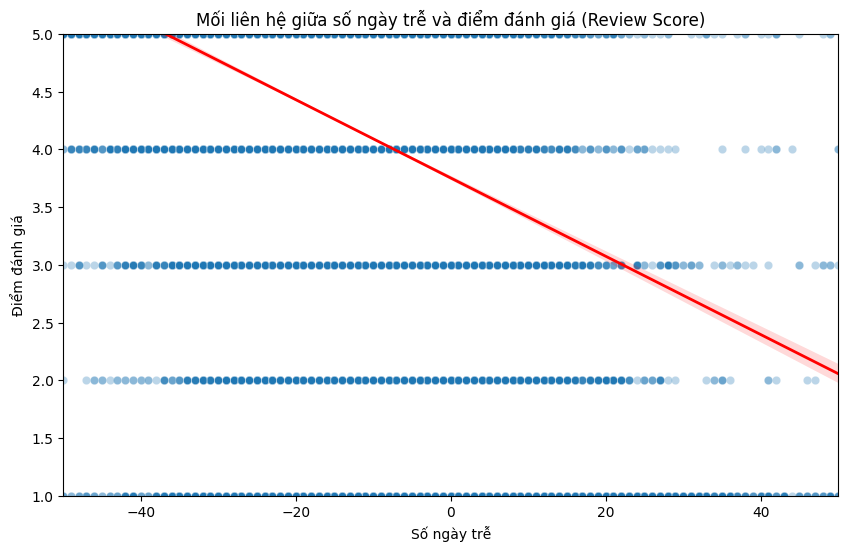

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gộp dữ liệu orders + review
df_review = orders.merge(reviews, on="order_id", how="inner")

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="delivery_delay",
    y="review_score",
    data=df_review,
    alpha=0.3  # trong suốt để nhìn rõ điểm chồng lên nhau
)

# Thêm trend line để thấy xu hướng
sns.regplot(
    x="delivery_delay",
    y="review_score",
    data=df_review,
    scatter=False,  # chỉ vẽ đường trend
    color="red",
    line_kws={"linewidth":2}
)

plt.title("Mối liên hệ giữa số ngày trễ và điểm đánh giá (Review Score)")
plt.xlabel("Số ngày trễ")
plt.ylabel("Điểm đánh giá")
plt.xlim(-50,50)  # giới hạn để loại outlier cực đoan
plt.ylim(1,5)
plt.show()

**Nhận xét**

* Scatter plot cho thấy có **mối quan hệ nghịch đảo** giữa số ngày giao trễ và điểm đánh giá.
* Đơn hàng **trễ càng nhiều** (ngày dương) → điểm đánh giá càng giảm, đặc biệt rõ rệt khi trễ khoảng **10–20 ngày**.
* Đơn hàng **giao sớm** (ngày âm) → điểm đánh giá tập trung cao ở **5 sao**, giao sớm quá mức (>40 ngày) không cải thiện thêm điểm.
* Điểm 1 sao chủ yếu xuất hiện ở các đơn **giao trễ**, 5 sao chủ yếu ở các đơn **đúng hạn hoặc sớm**.

💡 **Insight**

* **Hiệu suất logistics ảnh hưởng trực tiếp đến sự hài lòng khách hàng**.
* **Đúng hạn hoặc giao sớm nhẹ** giúp duy trì điểm đánh giá cao.
* **Giao hàng trễ** là nguyên nhân chính gây ra các **đánh giá thấp (1–2 sao)**, cần tối ưu để nâng trải nghiệm khách hàng.

##  3. Phân tích khám phá

### 3.1. Địa lý & Vận hành
**Mục tiêu**: Tìm hiểu xem yếu tố địa lý ảnh hưởng tiêu cực/tích cực thế nào đến trải nghiệm khách hàng.
- Có mối tương quan tuyến tính nào giữa Khoảng cách địa lý (Seller đến Customer) và Phí vận chuyển không? (Hay phí ship bị ảnh hưởng bởi kích thước hàng hóa nhiều hơn?).
- Khách ở vùng xa có chịu phí cao hơn?

#### Có mối tương quan tuyến tính nào giữa Khoảng cách địa lý (Seller đến Customer) và Phí vận chuyển không? (Hay phí ship bị ảnh hưởng bởi kích thước hàng hóa nhiều hơn?).

In [32]:
# Lấy dữ liệu địa lý của khách hàng
customers_df = customers.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")
orders_df = orders.merge(customers_df, on="customer_id", how="left")
df1 = orders_df[["order_id", "lat", "long"]]
df1 = df1.rename(columns={"lat": "customer_lat", "long": "customer_long"})

# Lấy dữ liệu địa lý của người bán
sellers_df = sellers.merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")
order_items_df = order_items.merge(sellers_df, on="seller_id", how="left")
df2 = order_items_df[["order_id", "seller_id", "lat", "long", "freight_value"]]
df2 = df2.groupby(["order_id"]).agg({"lat": "mean", "long": "mean", "freight_value": "sum"}).reset_index() # Lấy mean tọa độ người bán nếu có nhiều người bán cho 1 đơn.
df2 = df2.rename(columns={"lat": "seller_lat", "long": "seller_long"})

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Bán kính Trái Đất tính bằng km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

df = df1.merge(df2, on="order_id", how="inner")

# Tính khoảng cách giữa khách hàng và seller
df["distance_km"] = df.apply(
    lambda row: haversine(
        row["customer_lat"],
        row["customer_long"],
        row["seller_lat"],
        row["seller_long"]
    ),
    axis=1
)

df = df[["order_id", "distance_km", "freight_value"]]
df

,order_id,distance_km,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,18.538322,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,849.520470,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,514.407596,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,1822.132331,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,29.765008,8.72
...,...,...,...
98661,9c5dedf39a927c1b2549525ed64a053c,69.989989,13.08
98662,63943bddc261676b46f01ca7ac2f7bd8,474.076488,20.10
98663,83c1379a015df1e13d02aae0204711ab,967.980559,65.02
98664,11c177c8e97725db2631073c19f07b62,370.381594,81.18


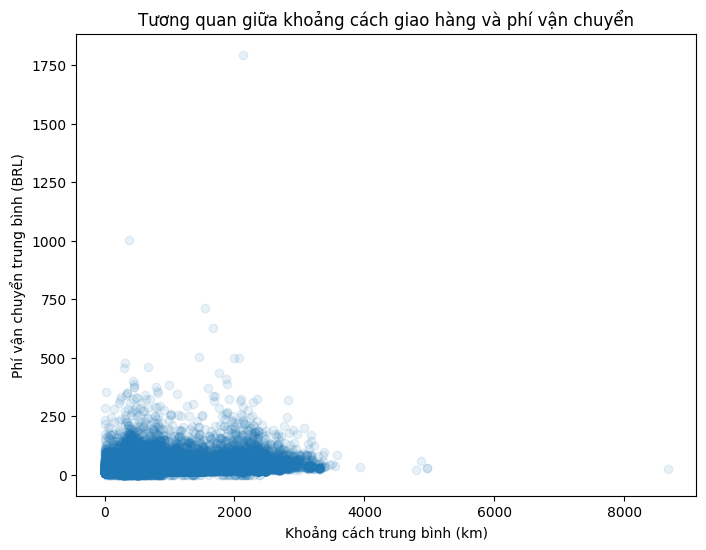

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df.distance_km, df.freight_value, alpha=0.1)

plt.xlabel("Khoảng cách trung bình (km)")
plt.ylabel("Phí vận chuyển trung bình (BRL)")
plt.title("Tương quan giữa khoảng cách giao hàng và phí vận chuyển")

plt.show()

In [34]:
print(df.corr(numeric_only=True))

               distance_km  freight_value
distance_km       1.000000       0.312797
freight_value     0.312797       1.000000


In [35]:
products_df = products[["product_id", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]]
products_df["volume"] = products_df["product_length_cm"] * products_df["product_height_cm"] * products_df["product_width_cm"]   
products_df = products_df[["product_id", "volume", "product_weight_g"]]
products_df

,product_id,volume,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,2240.0,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,10800.0,1000.0
2,96bd76ec8810374ed1b65e291975717f,2430.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,2704.0,371.0
4,9dc1a7de274444849c219cff195d0b71,4420.0,625.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,64000.0,12300.0
32947,bf4538d88321d0fd4412a93c974510e6,4864.0,1700.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,5103.0,1400.0
32949,83808703fc0706a22e264b9d75f04a2e,8060.0,700.0


In [36]:
order_df = order_items.merge(products_df, on="product_id", how="left")
df = order_df.groupby("order_id").agg({
    "volume": "sum",
    "product_weight_g": "sum",
    "freight_value": "sum"
}).reset_index()

df

,order_id,volume,product_weight_g,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3528.0,650.0,13.29
1,00018f77f2f0320c557190d7a144bdd3,60000.0,30000.0,19.93
2,000229ec398224ef6ca0657da4fc703e,14157.0,3050.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,2400.0,200.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,42000.0,3750.0,18.14
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,53400.0,10150.0,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,44460.0,8950.0,36.53
98663,fffce4705a9662cd70adb13d4a31832d,9576.0,967.0,16.95
98664,fffe18544ffabc95dfada21779c9644f,8000.0,100.0,8.72


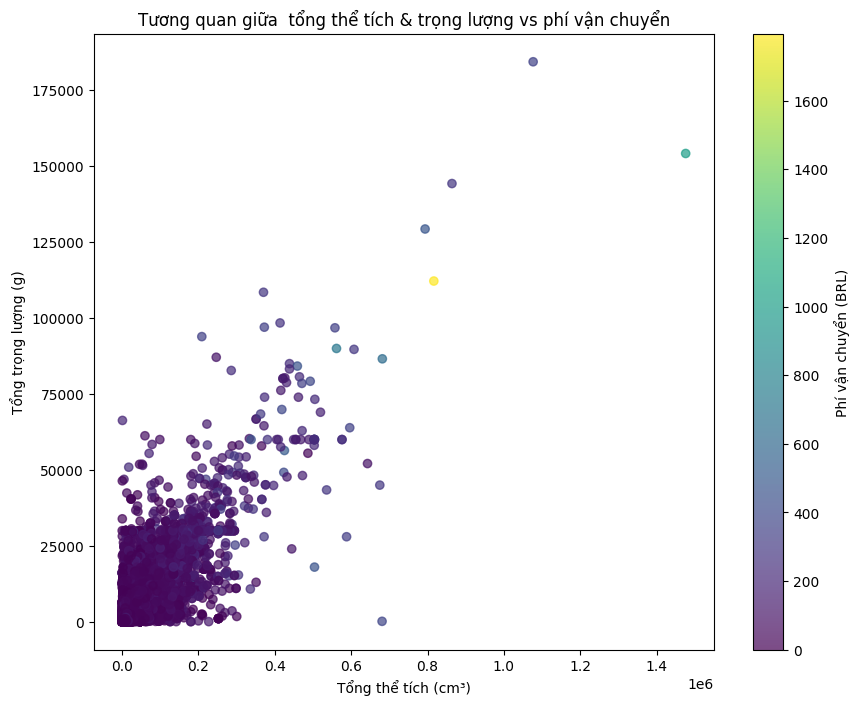

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sc = plt.scatter(df["volume"], df["product_weight_g"], c=df["freight_value"], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="Phí vận chuyển (BRL)")
plt.xlabel("Tổng thể tích (cm³)")
plt.ylabel("Tổng trọng lượng (g)")
plt.title("Tương quan giữa  tổng thể tích & trọng lượng vs phí vận chuyển")
plt.show()

In [38]:
print(df.corr(numeric_only=True))

                    volume  product_weight_g  freight_value
volume            1.000000          0.823720       0.641529
product_weight_g  0.823720          1.000000       0.639023
freight_value     0.641529          0.639023       1.000000


**Nhận xét**:

1.  **Mối quan hệ Chi phí - Khoảng cách (Biểu đồ 1: Distance vs. Freight Value):**
    * **Tương quan yếu:** Có một **tương quan thuận yếu** ($r \approx 0.31$) giữa khoảng cách và phí vận chuyển. Mặc dù chi phí có xu hướng tăng khi khoảng cách tăng, mối quan hệ này bị che mờ bởi độ phân tán dữ liệu rất lớn.
    * **Tập trung Dữ liệu:** Đa số giao dịch nằm ở khu vực khoảng cách ngắn/trung bình (dưới 3.000 km) và chi phí thấp (dưới 250 BRL).
    * **Phân tán giá mạnh:** Với cùng một khoảng cách, phí vận chuyển dao động rất mạnh, cho thấy khoảng cách **không phải là yếu tố quyết định chính** đối với chi phí.

2.  **Mối quan hệ Chi phí - Kích thước/Khối lượng (Biểu đồ 2: Volume & Weight vs. Freight Value):**
    * **Tương quan mạnh:** Có **tương quan thuận mạnh** giữa Phí vận chuyển với Tổng thể tích ($r \approx 0.64$) và Tổng trọng lượng ($r \approx 0.64$).
    * **Phân cụm rõ ràng:** Khi Tổng thể tích và Tổng trọng lượng tăng, Phí vận chuyển (thể hiện bằng màu sắc) cũng tăng lên rõ rệt (màu sắc chuyển từ tím/xanh đậm sang vàng/xanh lá).
    * **Outliers:** Các điểm ngoại lai có chi phí rất cao (màu vàng/xanh lá, Phí $\approx 1.500 - 1.750$ BRL) đều tương ứng với các đơn hàng có **Thể tích hoặc Trọng lượng lớn**.

💡**Insight**:

Yếu tố **Kích thước (Thể tích và Trọng lượng)** là động lực chính quyết định Phí vận chuyển, có ảnh hưởng mạnh hơn đáng kể so với **Khoảng cách**.

* Mặc dù khoảng cách đóng góp vào chi phí, nhưng việc **tăng khối lượng/kích thước** của kiện hàng gây ra sự gia tăng chi phí vận chuyển nhanh chóng và rõ ràng hơn.
* Để tối ưu hóa chi phí vận chuyển, doanh nghiệp cần tập trung vào việc **giảm thiểu thể tích đóng gói và trọng lượng hàng hóa** hơn là chỉ cố gắng tối ưu hóa khoảng cách giao hàng.
* Các điểm ngoại lai về chi phí cao trong Biểu đồ 1 được giải thích rõ ràng hơn trong Biểu đồ 2: chúng là những đơn hàng có **kích thước và trọng lượng lớn**.

#### Khách ở xa chịu phí cao hơn như thế nào? (Featuring nhóm vùng, khoảng cách các seller)

In [53]:
from scipy.spatial import cKDTree
import numpy as np

## Xác định khách cho từng order
df_orders = orders[["order_id", "customer_id"]] \
    .merge(customers[["customer_id", "customer_zip_code_prefix"]], on="customer_id", how="left") \
    .merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")[["order_id", 'customer_id', 'lat', 'long']]

df_orders = df_orders.rename(columns={"lat": "customer_lat", "long": "customer_long"})
df_orders = df_orders.dropna(subset=['customer_lat','customer_long'])

## Xác định seller cho từng order
df_sellers = order_items[["order_id", "seller_id", "product_id", "freight_value"]] \
    .merge(sellers[["seller_id", "seller_zip_code_prefix"]], on="seller_id", how="left") \
    .merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left") \
    [['order_id', "product_id", "freight_value", 'seller_id', 'lat', 'long']]

df_sellers = df_sellers.rename(columns={"lat": "seller_lat", "long": "seller_long"})
df_sellers = df_sellers.dropna(subset=['seller_lat','seller_long'])

## Gộp order với seller
df = df_orders.merge(df_sellers, on="order_id", how="inner")

## Tính khoảng cách Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['distance'] = df.apply(
    lambda row: haversine(row['customer_lat'], row['customer_long'], row['seller_lat'], row['seller_long']),
    axis=1
)

df['distance'] = df['distance'].round(0)

## Chia nhóm khoảng cách theo đơn hàng
bins = [-1, 100, 500, 1000, np.inf] 
labels = [1, 2, 3, 4]
df['distance_group'] = pd.cut(df['distance'], bins=bins, labels=labels)
df['distance_group'] = df['distance_group'].replace({4: 3}) 

# Lấy bảng cuối cho order_item
df_order_distance = df[["order_id", "seller_id", "product_id", "freight_value","customer_id", "distance", "distance_group"]]

In [54]:
# Nhóm để biết các sản phẩm cùng seller có nhiều khách ở các order khác nhau
seller_product_counts = df_order_distance.groupby(['seller_id', 'product_id'])['order_id'].nunique().reset_index()
seller_product_counts = seller_product_counts[seller_product_counts['order_id'] > 1]

# Chỉ lấy các order_item thỏa điều kiện này
df_multi_orders = df_order_distance.merge(
    seller_product_counts[['seller_id', 'product_id']], 
    on=['seller_id', 'product_id'], 
    how='inner'
)
df_multi_orders = df_multi_orders.drop_duplicates()

In [55]:
df_multi_orders[['order_id', 'seller_id', 'product_id', 'customer_id', 'freight_value', 'distance']].sort_values(
    ['seller_id', 'product_id', 'freight_value', "distance"]
)

,order_id,seller_id,product_id,customer_id,freight_value,distance
68328,7f39ba4c9052be115350065d07583cac,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,d7fc82cbeafea77bd0a8fbbf6296e387,21.02,417.0
62409,d455a8cb295653b55abda06d434ab492,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,944b72539d7e1f7f7fc6e46639ef1fe3,21.02,688.0
429,9dc8d1a6f16f1b89874c29c9d8d30447,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,d9442164acf4b03109425633efaa0cfc,21.02,714.0
9888,415c757c7bfdcb97055fb594b1672748,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,62c2c4e5b154ee57a365a112c97f9a65,20.65,20.0
69530,786a54ce0cf9dab273f41727d56f96ec,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,470cff54aa86be3ce142cc8406ad2084,23.00,1092.0
...,...,...,...,...,...,...
60213,81251f18621a822ad5b09593dfee4fc9,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129,ae4dce7235e0aac52e4b82c54f7b18de,10.96,121.0
86925,be580c71d638ce682e9792c27c7aacb2,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9,d163cf4e7699b15dd8bdd1e3c5860a89,11.74,88.0
33138,92a0ba3943ad83671830b1091c606671,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9,867c55ed114e42ec2f42e8f40b114cf4,15.56,482.0
32397,df537c849af44beef86a7ef7de12126a,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,e97a76910029690bc1f5b67376c38af5,10.96,97.0


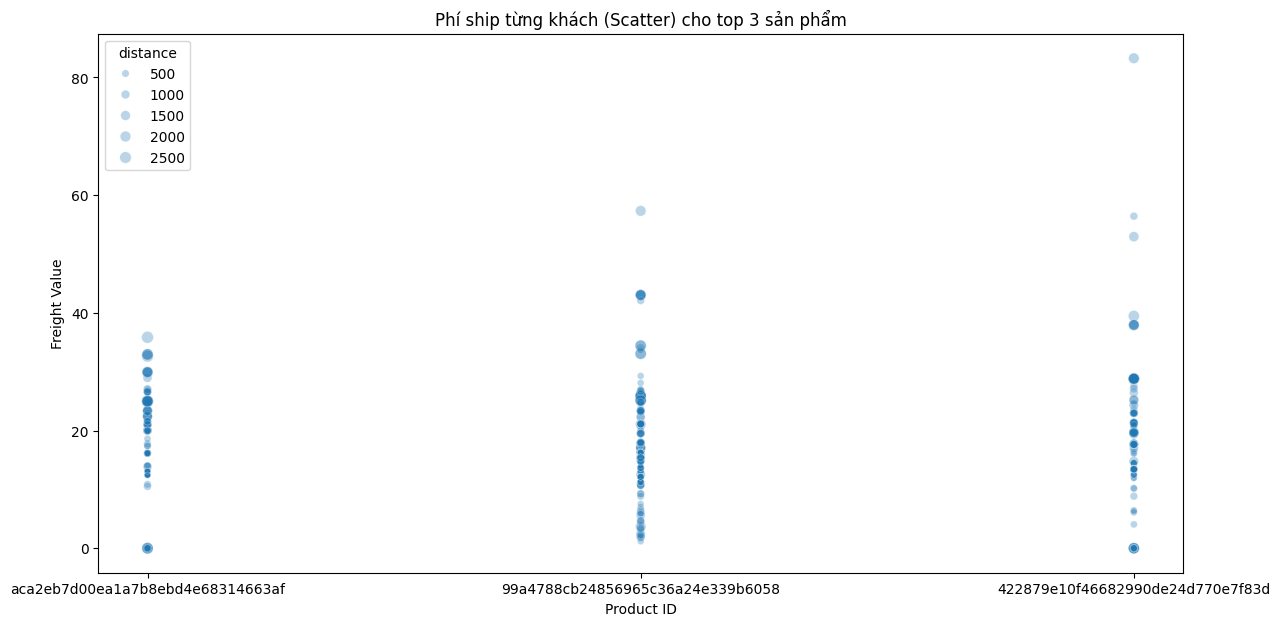

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy top 3 sản phẩm
top_products = df_multi_orders['product_id'].value_counts().nlargest(3).index
df_top3 = df_multi_orders[df_multi_orders['product_id'].isin(top_products)]

# Scatter plot – từng khách một, size theo khoảng cách
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df_top3,
    x='product_id',
    y='freight_value',
    size='distance',
    alpha=0.3
)
plt.title("Phí ship từng khách (Scatter) cho top 3 sản phẩm")
plt.ylabel("Freight Value")
plt.xlabel("Product ID")
plt.show()


### 3.2. Phân tích Giỏ hàng
**Mục tiêu**: Dù khách mua 1 lần, nhưng ta muốn khám phá xem họ kết hợp các sản phẩm như thế nào.
- Những danh mục nào thường xuyên xuất hiện cùng nhau trong một đơn hàng? (Ví dụ: Khách mua bed_bath_table có thường mua kèm furniture_decor không?).
- Có mối liên hệ nào giữa số lượng sản phẩm (Quantity) và Giá trị trung bình mỗi món (Unit Price)? (Khách mua nhiều món thường là món rẻ, hay đại gia mua nhiều món đắt?).

#### Những danh mục nào thường xuyên xuất hiện cùng nhau trong một đơn hàng? 

In [283]:
# Gắn category
df = order_items.merge(
    products[["product_id", "product_category_name"]],
    on="product_id",
    how="left"
)

# Giữ mỗi category 1 lần trong mỗi order
df = df.drop_duplicates(["order_id", "product_category_name"])

# Vứt order chỉ còn 1 category
df = df[
    df.groupby("order_id")["product_category_name"].transform("nunique") > 1
]

df = df[["order_id", "product_category_name"]]
df = df.dropna(subset=["product_category_name"])

print(df)

                                order_id product_category_name
80      002f98c0f7efd42638ed6100ca699b42        consoles_games
81      002f98c0f7efd42638ed6100ca699b42                  toys
151     005d9a5423d47281ac463a968b3936fb                  toys
152     005d9a5423d47281ac463a968b3936fb                  baby
550     014405982914c2cde2796ddcf0b8703d             perfumery
...                                  ...                   ...
112244  ff00a56fe9475a175cd651d77c707a09          home_confort
112363  ff40f38705c95a8eceea1a0db29bff66         watches_gifts
112364  ff40f38705c95a8eceea1a0db29bff66                 audio
112530  ffb8f7de8940249a3221252818937ecb             telephony
112531  ffb8f7de8940249a3221252818937ecb                  auto

[1467 rows x 2 columns]


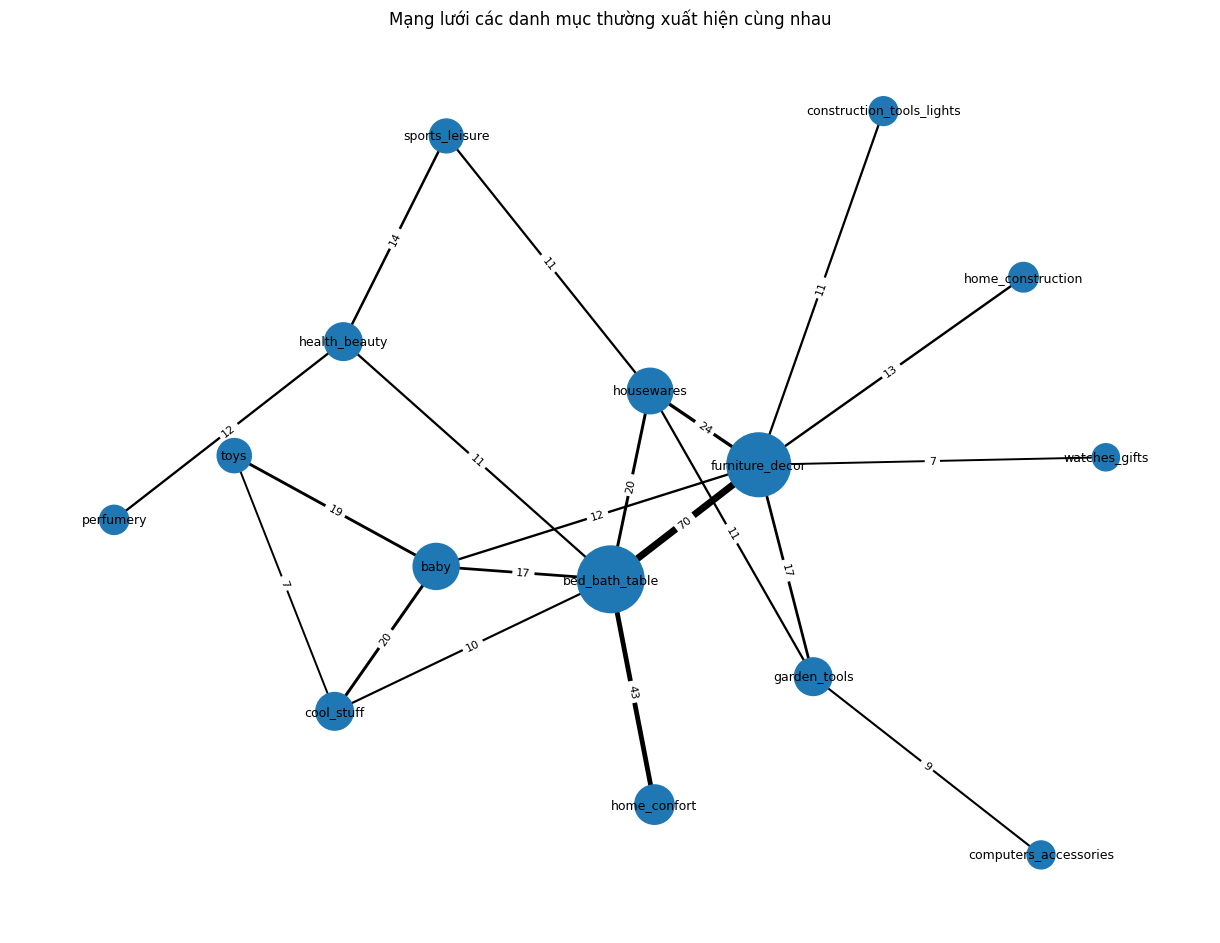

In [305]:
from itertools import combinations
from collections import Counter
import networkx as nx

def draw_category_network(
    df,
    order_col="order_id",
    cat_col="product_category_name",
    top_n=20,
    min_weight=2,
    figsize=(12, 9),
    seed=38
):
    # Gom category theo order
    order_cats = df.groupby(order_col)[cat_col].apply(list)

    # Đếm số lần các cặp category xuất hiện cùng nhau
    pair_counter = Counter(
        pair
        for cats in order_cats
        for pair in combinations(sorted(cats), 2)
    )

    pairs_df = (
        pd.DataFrame(
            [(a, b, w) for (a, b), w in pair_counter.items()],
            columns=["cat_a", "cat_b", "weight"]
        )
        .query("weight >= @min_weight")
        .sort_values("weight", ascending=False)
        .head(top_n)
    )

    # Build graph
    G = nx.from_pandas_edgelist(
        pairs_df,
        "cat_a",
        "cat_b",
        edge_attr="weight"
    )

    # Vẽ network
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, seed=seed, k=2)

    node_strength = dict(G.degree(weight="weight"))
    max_node = max(node_strength.values(), default=1)
    node_sizes = [300 + 2000 * node_strength[n] / max_node for n in G.nodes()]

    edge_weights = [d["weight"] for _, _, d in G.edges(data=True)]
    max_edge = max(edge_weights, default=1)
    edge_widths = [1 + 4 * w / max_edge for w in edge_weights]

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=node_sizes,
        width=edge_widths,
        font_size=9
    )

    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=nx.get_edge_attributes(G, "weight"),
        font_size=8
    )

    plt.title("Mạng lưới các danh mục thường xuất hiện cùng nhau")
    plt.axis("off")
    plt.show()

    return G, pairs_df

G, pairs_df = draw_category_network(df)

#### Có mối liên hệ nào giữa số lượng sản phẩm (Quantity) và Giá trị trung bình mỗi món (Unit Price)?

In [368]:
df = order_items.groupby("order_id").agg(
    total_quantity=('order_item_id', 'count'),        
    avg_unit_price=('price', lambda x: np.sum(x)/len(x))  # giá trung bình mỗi món
).reset_index()

In [369]:
print(df[['total_quantity','avg_unit_price']].corr())

                total_quantity  avg_unit_price
total_quantity         1.00000        -0.05846
avg_unit_price        -0.05846         1.00000


Cách chọn ngưỡng ngăn cách dùng tứ phân vị để chia mức giá trung bình thấp & cao

In [371]:
Q1 = df['avg_unit_price'].quantile(0.25)
Q3 = df['avg_unit_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR

print(upper_bound)

286.765


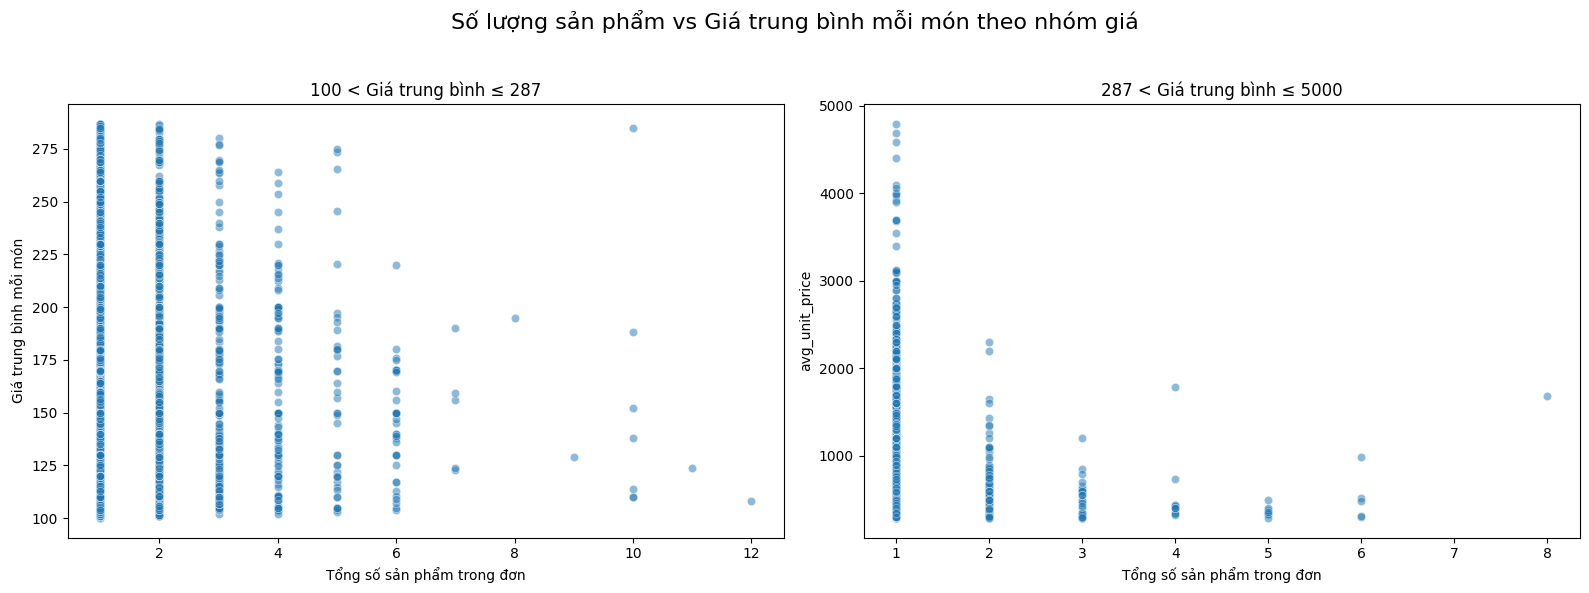

In [374]:
# Lọc dữ liệu
df_low = df[(df['avg_unit_price'] > 100) & (df['avg_unit_price'] <= 287)]
df_high = df[(df['avg_unit_price'] > 287) & (df['avg_unit_price'] <= 6000)]

# Tạo subplot
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Scatter plot nhóm giá thấp
sns.scatterplot(data=df_low, x='total_quantity', y='avg_unit_price', alpha=0.5, ax=axes[0])
axes[0].set_title("100 < Giá trung bình ≤ 287")
axes[0].set_xlabel("Tổng số sản phẩm trong đơn")
axes[0].set_ylabel("Giá trung bình mỗi món")

# Scatter plot nhóm giá cao
sns.scatterplot(data=df_high, x='total_quantity', y='avg_unit_price', alpha=0.5, ax=axes[1])
axes[1].set_title("287 < Giá trung bình ≤ 5000")
axes[1].set_xlabel("Tổng số sản phẩm trong đơn")
axes[0].set_ylabel("Giá trung bình mỗi món")

plt.suptitle("Số lượng sản phẩm vs Giá trung bình mỗi món theo nhóm giá", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Nhận xét**

1.  **Nhóm Giá Thấp-Trung bình (100 < Giá trung bình $\le$ 287 BRL):**
    * **Tập trung cao ở Quantity = 1:** Mật độ điểm dữ liệu vẫn cực kỳ dày đặc ở cột **Tổng số sản phẩm = 1**, ngay cả trong phạm vi giá này.
    * **Giới hạn số lượng:** Số lượng sản phẩm tối đa là **12**, và chỉ có rất ít đơn hàng mua trên 7 món.
    * **Xu hướng giữ giá:** Giá trung bình dường như **không giảm mạnh** khi số lượng tăng từ 1 lên 4, mà duy trì độ phân tán khá đồng đều trong phạm vi $100 - 287$ BRL.

2.  **Nhóm Giá Cao (287 < Giá trung bình $\le$ 5000 BRL):**
    * **Độc quyền Mua 1 món:** Cực kỳ rõ ràng, phần lớn các đơn hàng có giá trị trung bình cao **chỉ mua 1 sản phẩm**. Cột Quantity = 1 gần như bao phủ toàn bộ trục Y.
    * **Số lượng Giới hạn:** Số lượng sản phẩm tối đa chỉ là **8**.
    * **Xu hướng Giảm Giá Cực Đoan:**
        * Mặc dù các điểm có giá trị $> 1000$ BRL hầu như chỉ nằm ở Quantity = 1, nhưng các đơn hàng mua **từ 3 sản phẩm trở lên** đều có giá trung bình mỗi món **giảm rất nhanh** và tập trung ở mức dưới 1000 BRL (và hầu hết là dưới 500 BRL).
    * **Đại gia không mua nhiều:** Hoàn toàn không có điểm dữ liệu nào cho thấy khách hàng mua số lượng lớn (ví dụ: > 8 món) mà vẫn giữ được giá trị trung bình mỗi món cao.

**Insight**

* **Xác nhận Phân khúc Khách hàng:**
    * Phân tích này **xác nhận mạnh mẽ** kết luận trước đó: Khách hàng mua **sản phẩm đắt tiền** (giá trị đơn vị cao) gần như luôn giới hạn đơn hàng của họ ở **1 sản phẩm**.
* **Ngưỡng Giá trị Đơn vị/Số lượng:**
    * Khi khách hàng mua **từ 3 sản phẩm trở lên**, họ **tuyệt đối không mua** các sản phẩm có giá trị đơn vị cao (trên 1000 BRL). Nếu họ mua nhiều món, tổng giá trị đơn hàng có thể cao, nhưng giá trung bình của từng món buộc phải giảm về mức phổ thông.
* **Chiến lược Kinh doanh:**
    * Đối với **sản phẩm cao cấp**, doanh nghiệp nên tập trung vào trải nghiệm mua sắm **1 sản phẩm** tối ưu (dịch vụ khách hàng, giao hàng), vì đây là nơi tập trung doanh thu giá trị đơn vị cao nhất.
    * Đối với **sản phẩm mua số lượng lớn**, nên chấp nhận rằng chúng là các mặt hàng có biên lợi nhuận đơn vị thấp hơn và cần tập trung vào hiệu suất bán hàng theo lô/số lượng.

### 3.3. Động lực của Sự hài lòng
**Mục tiêu**: Tìm ra "thủ phạm" thực sự khiến khách hàng đánh giá thấp/cao.
- Biểu đồ tương quan giữa "Số ngày giao hàng" và "Review Score"? Có phải cứ giao > 10 ngày là điểm rớt xuống dưới 3 sao?
- Mối quan hệ giữa "Gap Time" (Ngày giao thực tế - Ngày giao dự kiến) và Review Score. Khách hàng ghét việc "chờ lâu" hay ghét việc "bị thất hứa" hơn?
- Liệu khách hàng có giá trị thanh toán cao (payment_value) có xu hướng cho điểm đánh giá thấp hơn do kỳ vọng dịch vụ cao hơn hay không?

#### Biểu đồ tương quan giữa "Số ngày giao hàng" và "Review Score". Có phải cứ giao > 10 ngày là điểm rớt xuống dưới 3 sao?

In [87]:
df = reviews[["order_id", "review_score"]].merge(orders[["order_id", "order_purchase_timestamp", "order_delivered_customer_date"]], on="order_id", how="left")
df["delivery_delay"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Tỉ lệ review <=3 sao cho đơn giao >10 ngày
long_delivery = df[df['delivery_delay'] > 10]
short_delivery = df[df['delivery_delay'] <= 10]

print("Tỉ lệ review <=3 sao khi giao >10 ngày:", (long_delivery['review_score'] <= 3).mean())
print("Tỉ lệ review <=3 sao khi giao <=10 ngày:", (short_delivery['review_score'] <= 3).mean())

Tỉ lệ review <=3 sao khi giao >10 ngày: 0.2847302211080245
Tỉ lệ review <=3 sao khi giao <=10 ngày: 0.1479397872585538


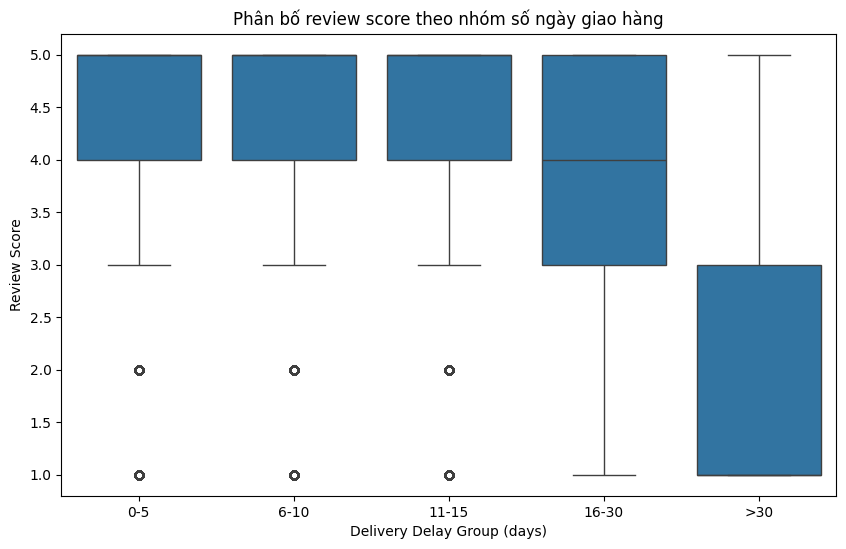

In [88]:
bins = [0, 5, 10, 15, 30, df['delivery_delay'].max()]
labels = ['0-5','6-10','11-15','16-30','>30']
df['delay_group'] = pd.cut(df['delivery_delay'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='delay_group', y='review_score')
plt.title("Phân bố review score theo nhóm số ngày giao hàng")
plt.xlabel("Delivery Delay Group (days)")
plt.ylabel("Review Score")
plt.show()

**Nhận xét:**

1.  **Điểm đánh giá Cao ổn định (0-15 ngày trễ):**
    * Đối với các nhóm giao hàng trễ **từ 0 đến 15 ngày** (0-5, 6-10, 11-15), điểm đánh giá **Trung vị (Median)** đều là **5.0** (mức tối đa). Điều này cho thấy phần lớn khách hàng vẫn hài lòng tuyệt đối mặc dù có sự chậm trễ ở mức độ này.
    * Khoảng phân vị (IQR) (phần hộp) cũng nằm ở mức cao, từ 4.0 đến 5.0.

2.  **Sự suy giảm rõ rệt (16-30 ngày trễ):**
    * Khi thời gian trễ tăng lên **16-30 ngày**, điểm Trung vị **giảm mạnh từ 5.0 xuống 4.0**.
    * Khoảng phân vị (IQR) cũng mở rộng và dịch chuyển xuống, cho thấy sự gia tăng đáng kể các đánh giá thấp hơn 5.0.

3.  **Tác động nghiêm trọng (>30 ngày trễ):**
    * Đây là nhóm bị ảnh hưởng nặng nề nhất. Điểm Trung vị **giảm xuống 3.0** (mức trung bình), và phần Hộp (IQR) **giảm sâu**, trải dài từ 1.0 đến 3.0.
    * Điều này chỉ ra rằng phần lớn khách hàng trải qua sự chậm trễ hơn 30 ngày đều không hài lòng, với nhiều đánh giá nằm ở mức **1.0 hoặc 2.0**.

**Insight:**

* **Ngưỡng chịu đựng (Threshold):** Khách hàng có xu hướng **chịu đựng tốt** sự chậm trễ ở mức độ nhỏ và trung bình (dưới 15 ngày) mà không ảnh hưởng lớn đến điểm đánh giá tối đa.
* **Điểm bùng phát (Critical Point):** Mối tương quan tiêu cực trở nên **rõ ràng và nghiêm trọng** khi thời gian giao hàng trễ **vượt quá 15 ngày**.
* **Mục tiêu Logistics:** Để bảo vệ danh tiếng và điểm Review Score, nỗ lực logistics cần tập trung vào việc **đảm bảo không có đơn hàng nào bị chậm trễ quá 15 ngày**, và ưu tiên xử lý dứt điểm các trường hợp có nguy cơ trễ trên 30 ngày.

#### Mối quan hệ giữa "Gap Time" (Ngày giao thực tế - Ngày giao dự kiến) và Review Score. Khách hàng ghét việc "chờ lâu" hay ghét việc "bị thất hứa" hơn?

In [104]:
df = reviews[["order_id", "review_score"]].merge(orders[["order_id", "order_estimated_delivery_date", "order_delivered_customer_date"]], on="order_id", how="left")
df["gap_time"] = (df["order_estimated_delivery_date"] - df["order_delivered_customer_date"]).dt.days

In [109]:
# Đơn hàng giao đúng giờ và sớm
early_orders = df[df['gap_time'] >= 0]

# Thống kê review
print("Tỷ lệ sao đánh giá cho đơn hàng giao đúng giờ và sớm:")
print(early_orders['review_score'].value_counts(normalize=True)) # tỉ lệ từng sao 

Tỷ lệ sao đánh giá cho đơn hàng giao đúng giờ và sớm:
review_score
5    0.624298
4    0.203400
3    0.079925
1    0.066040
2    0.026337
Name: proportion, dtype: float64


In [108]:
# Đơn hàng giao trễ
late_orders = df[df['gap_time'] < 0]

# Thống kê review
print("Tỷ lệ sao đánh giá cho đơn hàng giao trễ:")
print(late_orders['review_score'].value_counts(normalize=True)) # tỉ lệ từng sao 

Tỷ lệ sao đánh giá cho đơn hàng giao trễ:
review_score
1    0.461499
5    0.222179
4    0.123880
3    0.113751
2    0.078691
Name: proportion, dtype: float64


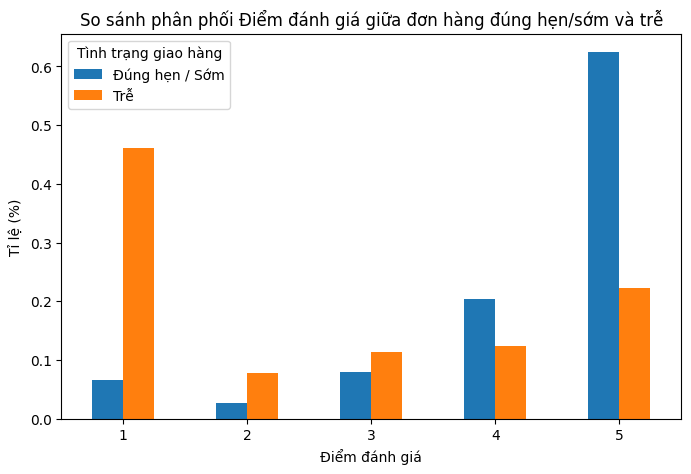

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo bảng tỉ lệ review score theo nhóm
early_prop = early_orders['review_score'].value_counts(normalize=True).sort_index()
late_orders = df[df['gap_time'] < 0]
late_prop = late_orders['review_score'].value_counts(normalize=True).sort_index()

df_plot = pd.DataFrame({
    'Đúng hẹn / Sớm': early_prop,
    'Trễ': late_prop
}).fillna(0)

# Vẽ biểu đồ cột so sánh
ax = df_plot.plot(kind='bar', figsize=(8,5))
ax.set_title("So sánh phân phối Điểm đánh giá giữa đơn hàng đúng hẹn/sớm và trễ", fontsize=12)
ax.set_xlabel("Điểm đánh giá", fontsize=10)
ax.set_ylabel("Tỉ lệ (%)", fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Tình trạng giao hàng")
plt.show()

**Nhận xét:**

1.  **Sự Khác biệt Cực lớn ở Mức Tối đa (5 Sao):**
    * Tỷ lệ đơn hàng **Đúng hẹn/Sớm** nhận được **5 sao** chiếm ưu thế tuyệt đối (**62.43%**).
    * Ngược lại, tỷ lệ 5 sao cho đơn hàng **Trễ** chỉ là **22.22%**, một mức giảm hơn **2.8 lần**.

2.  **Sự Gia tăng Khủng khiếp ở Mức Tối thiểu (1 Sao):**
    * Tỷ lệ đơn hàng **Trễ** bị đánh giá **1 sao** là **46.15%** (gần một nửa tổng số đơn trễ).
    * Tỷ lệ 1 sao cho đơn hàng **Đúng hẹn/Sớm** chỉ là **6.60%**. Điều này cho thấy sự chậm trễ làm tăng tỷ lệ đánh giá tiêu cực (1 sao) lên **gần 7 lần**.

3.  **Thay đổi Cấu trúc Đánh giá:**
    * **Đúng hẹn/Sớm:** Dữ liệu phân bố theo hình chữ J ngược, với phần lớn điểm tập trung ở 5 sao và giảm dần.
    * **Trễ:** Dữ liệu phân bố ngược hoàn toàn. **1 sao** trở thành điểm đánh giá phổ biến nhất, sau đó là 5 sao, cho thấy sự chậm trễ cực kỳ phân cực trải nghiệm của khách hàng (hoặc rất tệ, hoặc vẫn hài lòng).

**Insight:**

1.  **Tính Đúng Hẹn là Yếu tố then chốt (Key Driver) của Sự Hài lòng:** Việc đảm bảo giao hàng **đúng hẹn/sớm** là yếu tố quan trọng nhất để đạt được điểm đánh giá cao (5 sao) và duy trì danh tiếng tích cực.
2.  **Rủi ro Giao Hàng Trễ:** Giao hàng trễ là **rủi ro lớn nhất** đối với điểm đánh giá, khi nó chuyển đổi phân phối điểm từ chủ yếu là 5 sao sang chủ yếu là 1 sao. Việc này cho thấy khách hàng sẵn sàng phản ứng rất gay gắt với sự chậm trễ.
3.  **Tác động của Outliers (Nhóm 5 Sao Giao Trễ):** Mặc dù 1 sao là phổ biến nhất cho đơn trễ, việc vẫn có tới 22.22% đơn trễ nhận 5 sao gợi ý rằng có những yếu tố khác (chất lượng sản phẩm, dịch vụ khách hàng chủ động) đã cứu vãn trải nghiệm giao hàng tiêu cực.
4.  **Hành động ưu tiên:** Cải thiện hiệu suất giao hàng (giảm tỷ lệ trễ) là biện pháp **có tác động lớn nhất và trực tiếp nhất** đến việc cải thiện điểm đánh giá tổng thể của doanh nghiệp.

#### Liệu khách hàng có giá trị thanh toán cao (payment_value) có xu hướng cho điểm đánh giá thấp hơn do kỳ vọng dịch vụ cao hơn hay không?

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. Gộp dữ liệu theo order
# =========================
df = (
    orders
    .merge(payments, on="order_id", how="left")
    .merge(customers, on="customer_id", how="left")
)

df = (
    df.groupby(["customer_id", "order_id"], as_index=False)
      .agg(total_payment_value=("payment_value", "sum"))
)

df = df.merge(
    reviews[["order_id", "review_score"]],
    on="order_id",
    how="left"
)

In [200]:
print("Xem sơ bộ phân bố giá trị đơn")
print(df["total_payment_value"].describe())

Xem sơ bộ phân bố giá trị đơn
count    99992.000000
mean       160.827074
std        221.579576
min          0.000000
25%         61.987500
50%        105.280000
75%        176.830000
max      13664.080000
Name: total_payment_value, dtype: float64


Do phân phối giá trị đơn hàng lệch phải mạnh, phương pháp phân vị 75% vẫn bao gồm nhiều đơn có giá trị chênh lệch quá lớn. Vì vậy, nghiên cứu này chỉ tập trung vào 0.02% đơn hàng có giá trị cao nhất nhằm đại diện rõ ràng hơn cho nhóm “đơn rất đắt”, nơi kỳ vọng dịch vụ của khách hàng được cho là cao nhất.

In [211]:
p98 = df['total_payment_value'].quantile(0.998)
n = (df['total_payment_value'] >= p98).sum()

print(f"Có {n} đơn hàng có giá trị trên {p98}")

Có 200 đơn hàng có giá trị trên 2027.6679999999965


In [209]:
# =========================
# 2. Xác định "đơn rất đắt" = top 2%
# =========================
threshold = df['total_payment_value'].quantile(0.998)

df['is_outlier'] = df['total_payment_value'] >= threshold

outliers_df = df[df['is_outlier']]
normal_df   = df[~df['is_outlier']]

print("Ngưỡng đơn rất đắt:", threshold)
print("Số đơn rất đắt:", outliers_df.shape[0])

# =========================
# 3. So sánh review
# =========================
summary = (
    df.groupby('is_outlier')['review_score']
      .agg(['mean', 'median', 'count'])
)

summary.index = ['Đơn thường', 'Đơn rất đắt']
print(summary)

Ngưỡng đơn rất đắt: 2027.6679999999965
Số đơn rất đắt: 200
                 mean  median  count
Đơn thường   4.087258     5.0  99028
Đơn rất đắt  3.663265     5.0    196


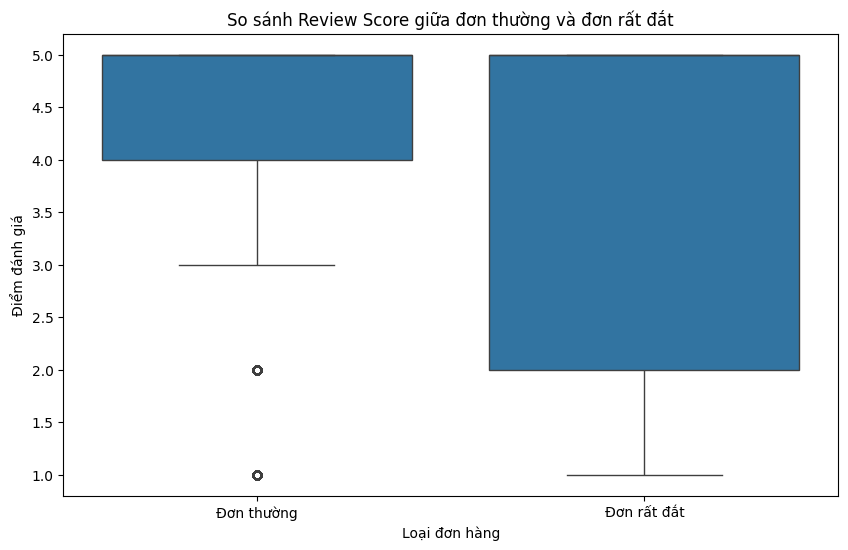

In [212]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='is_outlier',
    y='review_score'
)

plt.xticks([0,1], ['Đơn thường', 'Đơn rất đắt'])
plt.xlabel("Loại đơn hàng")
plt.ylabel("Điểm đánh giá")
plt.title("So sánh Review Score giữa đơn thường và đơn rất đắt")
plt.show()

**Nhận xét**

* **Median giống nhau (5.0):** Hơn 50% đơn hàng ở cả hai nhóm đều được đánh giá hài lòng tuyệt đối.
* **Mean giảm rõ rệt:** Đơn rất đắt có điểm trung bình thấp hơn đáng kể so với đơn thường (↓ ~0.4 điểm).
* **Rủi ro đánh giá thấp cao hơn:** Với đơn rất đắt, các đánh giá 1–2 sao xuất hiện thường xuyên hơn và không còn là ngoại lệ.

**Insight**

* **Chi tiêu cao → kỳ vọng cao:** Khách mua đơn rất đắt ít khoan dung hơn khi gặp sự cố.
* **Trải nghiệm xấu gây tổn hại lớn:** Một lỗi nhỏ ở đơn giá trị cao có thể kéo điểm đánh giá giảm mạnh.
* **Cần ưu tiên dịch vụ:** Đơn hàng rất đắt nên được xử lý theo cơ chế “VIP” để giảm rủi ro đánh giá tiêu cực.

## other

#### Số lượng khách mới theo tháng trong 6 tháng gần nhất là bao nhiêu?

In [43]:
# Ngày cuối cùng
last_date = pd.to_datetime(orders["order_purchase_timestamp"].max())

# 6 tháng trước
six_month_before = last_date - pd.DateOffset(months=6)

print(f"Ngày cuối cùng của bộ dữ liệu: {last_date}")

# Merge customer và orders, giữ cột cần thiết
df = customers.merge(orders, on="customer_id", how="left")
df = df[["customer_unique_id", "order_purchase_timestamp"]]

# Lấy đơn đầu tiên 
df = df.groupby("customer_unique_id")["order_purchase_timestamp"].min().reset_index(name="first_purchase_date")

# Thêm cột ngày cuối cùng
df["last_date"] = last_date

# Chuyển về datetime nếu chưa phải
df["first_purchase_date"] = pd.to_datetime(df["first_purchase_date"])
df["last_date"] = pd.to_datetime(df["last_date"])

# Trừ lấy số tháng
df["month_diff"] = (df["last_date"].dt.to_period("M") - df["first_purchase_date"].dt.to_period("M")).apply(lambda x: x.n)

df = df.groupby("month_diff").size().reset_index(name="count")
df = df[(df["month_diff"] > 0) & (df["month_diff"] < 7)]
df

Ngày cuối cùng của bộ dữ liệu: 2018-10-17 17:30:18


,month_diff,count
1,1,5
2,2,6271
3,3,6071
4,4,5940
5,5,6622
6,6,6711


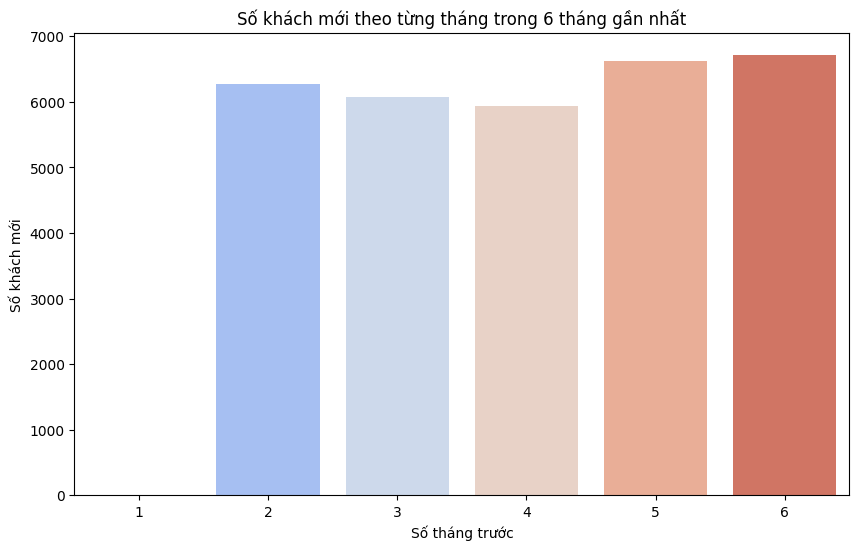

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["month_diff"].index, y=df["count"], palette="coolwarm")
plt.title("Số khách mới theo từng tháng trong 6 tháng gần nhất")
plt.xlabel("Số tháng trước")
plt.ylabel("Số khách mới")
plt.show()

**Nhận xét**

- **Tháng gần nhất**: Chỉ có 5 khách hoàn toàn mới.  
- **2–6 tháng gần nhất**: Số khách mới khá đều, từ ~5.900 đến 6.700 khách/tháng.  

💡 **Insight**: Khách mới **được thêm dần theo từng tháng**, không có tăng đột biến, cho thấy tăng trưởng khách mới ổn định.  

#### RFM

In [45]:
# Tính RFM
RFM_df = payments.groupby("order_id")["payment_value"].sum().reset_index()
RFM_df = orders.merge(payments, on="order_id", how="left")

RFM_df = customers.merge(RFM_df, on="customer_id", how="left")
RFM_df = RFM_df.groupby("customer_unique_id").agg(
    recency=("order_purchase_timestamp", "max"),    # Đơn cuối
    monetary=("payment_value", "sum"),              # Tổng tiền
    frequency=("customer_id", "count")              # Số đơn hàng
).reset_index()

RFM_df["recency"] = (pd.to_datetime(orders["order_purchase_timestamp"].max()) - pd.to_datetime(RFM_df["recency"])).dt.days

# Tính điểm RFM
RFM_df["R_score"] = pd.qcut(RFM_df["recency"].rank(method='first'), 5, labels=[5,4,3,2,1])
RFM_df["F_score"] = pd.qcut(RFM_df["frequency"].rank(method='first'), 5, labels=[1,2,3,4,5])
RFM_df["M_score"] = pd.qcut(RFM_df["monetary"].rank(method='first'), 5, labels=[1,2,3,4,5])
RFM_df["RFM_score"] = RFM_df["R_score"].astype(str) + RFM_df["F_score"].astype(str) + RFM_df["M_score"].astype(str)

RFM_df

,customer_unique_id,recency,monetary,frequency,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,141.90,1,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,27.19,1,4,1,1,411
2,0000f46a3911fa3c0805444483337064,585,86.22,1,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,369,43.62,1,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,336,196.89,1,2,1,4,214
...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,495,2067.42,1,1,5,5,155
96092,fffea47cd6d3cc0a88bd621562a9d061,310,84.58,1,3,5,2,352
96093,ffff371b4d645b6ecea244b27531430a,617,112.46,1,1,5,3,153
96094,ffff5962728ec6157033ef9805bacc48,168,133.69,1,4,5,4,454


In [46]:
RFM_df["R_score"].value_counts().sort_index()

R_score
5    19220
4    19219
3    19219
2    19219
1    19219
Name: count, dtype: int64

In [47]:
RFM_df["M_score"].value_counts().sort_index()

M_score
1    19220
2    19219
3    19219
4    19219
5    19219
Name: count, dtype: int64

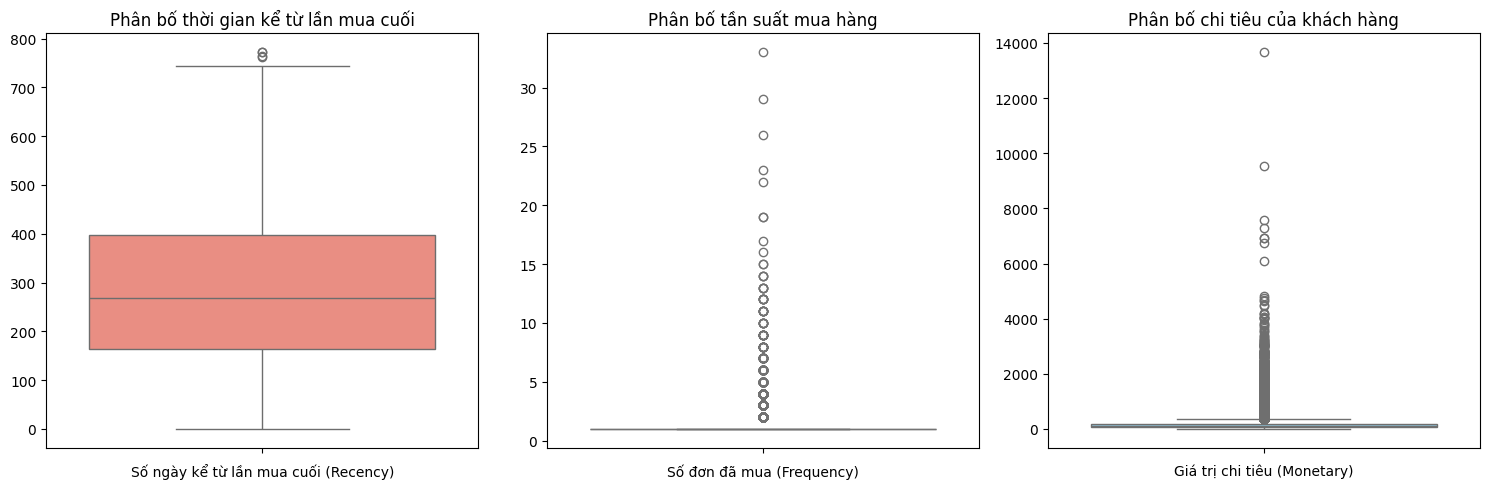

In [48]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # 1 hàng 3 cột, vị trí 3
sns.boxplot(RFM_df["recency"], color='salmon')
plt.title("Phân bố thời gian kể từ lần mua cuối")
plt.xlabel("Số ngày kể từ lần mua cuối (Recency)")
plt.ylabel("") 

plt.subplot(1, 3, 2)  # 1 hàng 3 cột, vị trí 2
sns.boxplot(RFM_df["frequency"], color='lightgreen')
plt.title("Phân bố tần suất mua hàng")
plt.xlabel("Số đơn đã mua (Frequency)")
plt.ylabel("") 

plt.subplot(1, 3, 3)  # 1 hàng 3 cột, vị trí 1
sns.boxplot(RFM_df["monetary"], color='skyblue')
plt.title("Phân bố chi tiêu của khách hàng")
plt.xlabel("Giá trị chi tiêu (Monetary)")
plt.ylabel("") 

plt.tight_layout()
plt.show()